In [1]:
import json
from pathlib import Path

# Load results for a specific problem
problem_id = "problem_6481"  # Your processed problem
results_dir = Path("rollout_results_no_ablation_with_text") / problem_id

# Load the sentence rollouts
with open(results_dir / "sentence_rollouts_last_186.json", 'r') as f:
    sentence_rollouts_no_ablation = json.load(f)

print(f"Loaded no_ablation sentence results")

Loaded no_ablation sentence results


In [2]:
import json
from pathlib import Path

# Load results for a specific problem
problem_id = "problem_6481"  # Your processed problem
results_dir = Path("rollout_results_ablation_with_text") / problem_id

# Load the sentence rollouts
with open(results_dir / "sentence_multi_head_ablation_rollouts.json", 'r') as f:
    sentence_rollouts_ablation = json.load(f)

print(f"Loaded ablation sentence results")

Loaded ablation sentence results


In [3]:
import json
from pathlib import Path

# Load results for a specific problem
problem_id = "problem_6481"  # Your processed problem
results_dir = Path("random_rollout_results_ablation_with_text") / problem_id

# Load the sentence rollouts
with open(results_dir / "sentence_multi_head_ablation_rollouts.json", 'r') as f:
    sentence_rollouts_random_ablation = json.load(f)

print(f"Loaded random ablation sentence results")

Loaded random ablation sentence results


In [4]:
generated_text_no_ablation = sentence_rollouts_no_ablation["rollout_texts"]
generated_text_ablation = sentence_rollouts_ablation[0]["rollout_texts"]
generated_text_random_ablation = sentence_rollouts_random_ablation[0]["rollout_texts"]


In [5]:
from typing import List, Dict
def split_solution_into_chunks(solution_text: str) -> List[str]:
    """
    Split a solution into chunks for rollout generation.

    Args:
        solution_text: The full solution text

    Returns:
        List of chunks
    """
    # First, remove the prompt part if present
    if "<think>" in solution_text:
        solution_text = solution_text.split("<think>")[1].strip()

    # Remove the closing tag if present
    if "</think>" in solution_text:
        solution_text = solution_text.split("</think>")[0].strip()

    # Define patterns for chunk boundaries
    sentence_ending_tokens = [".", "?", "!"]
    paragraph_ending_patterns = ["\n\n", "\r\n\r\n"]

    # Split the text into chunks
    chunks = []
    current_chunk = ""

    # Process the text character by character
    i = 0
    while i < len(solution_text):
        current_chunk += solution_text[i]

        # Check for paragraph endings
        is_paragraph_end = False
        for pattern in paragraph_ending_patterns:
            if (
                i + len(pattern) <= len(solution_text)
                and solution_text[i : i + len(pattern)] == pattern
            ):
                is_paragraph_end = True
                break

        # Check for sentence endings followed by space or newline
        is_sentence_end = False
        if i < len(solution_text) - 1 and solution_text[i] in sentence_ending_tokens:
            next_char = solution_text[i + 1]
            if next_char == " " or next_char == "\n":
                is_sentence_end = True

        # If we found a boundary, add the chunk and reset
        if is_paragraph_end or is_sentence_end:
            if current_chunk.strip():
                chunks.append(current_chunk.strip())
                current_chunk = ""

        i += 1

    # # Add the last chunk if not empty
    # if current_chunk.strip():
    #     chunks.append(current_chunk.strip())
    #     chunk_idxs.append(len(solution_text) - 1)  # Add last index

    # Merge small chunks (less than 10 characters)
    i = 0
    while i < len(chunks):
        if len(chunks[i]) < 10:
            # If this is the last chunk, merge with previous chunk if possible
            if i == len(chunks) - 1:
                if i > 0:
                    chunks[i - 1] = chunks[i - 1] + " " + chunks[i]
                    chunks.pop(i)
            # Otherwise merge with the next chunk
            else:
                chunks[i + 1] = chunks[i] + " " + chunks[i + 1]
                chunks.pop(i)
                # Don't increment i since we need to check the new merged chunk
            # If we're at the beginning and there's only one chunk, just keep it
            if i == 0 and len(chunks) == 1:
                break
        else:
            i += 1

    # chunk_boundaries = [(chunk_idxs[i], chunk_idxs[i + 1]) for i in range(len(chunk_idxs) - 1)]
    # chunk_boundaries.append((chunk_idxs[-1], len(solution_text)))

    # if get_idxs:
    #     return chunks, chunk_boundaries
    # else:
    return chunks
rollout_sentences = [split_solution_into_chunks(rollout_text)[0] for rollout_text in generated_text_no_ablation]
rollout_sentences == sentence_rollouts_no_ablation["rollout_sentences"]

True

In [6]:
length_no_ablation = [len(text) for text in generated_text_no_ablation]
length_ablation = [len(text) for text in generated_text_ablation]
length_random_ablation = [len(text) for text in generated_text_random_ablation]

In [7]:
length_no_ablation

[3504, 8334, 11336, 10946, 11414, 8214, 8098, 10550, 7124, 5738, 9571, 7471]

In [8]:
length_ablation

[8011, 9769, 5872, 10986, 6953, 10073, 7318, 7442, 5810, 14311, 6662, 8959]

In [9]:
length_random_ablation

[8492, 4169, 7359, 12861, 12774, 6492, 7249, 11101, 8244, 7056, 6572, 6917]

In [10]:
import numpy as np

print("Mean character length (no ablation):", np.mean(length_no_ablation))
print("Mean character length (ablation):", np.mean(length_ablation))
print("Mean character length (random ablation):", np.mean(length_random_ablation))

Mean character length (no ablation): 8525.0
Mean character length (ablation): 8513.833333333334
Mean character length (random ablation): 8273.833333333334


/tmp/ipykernel_1702953/787702162.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


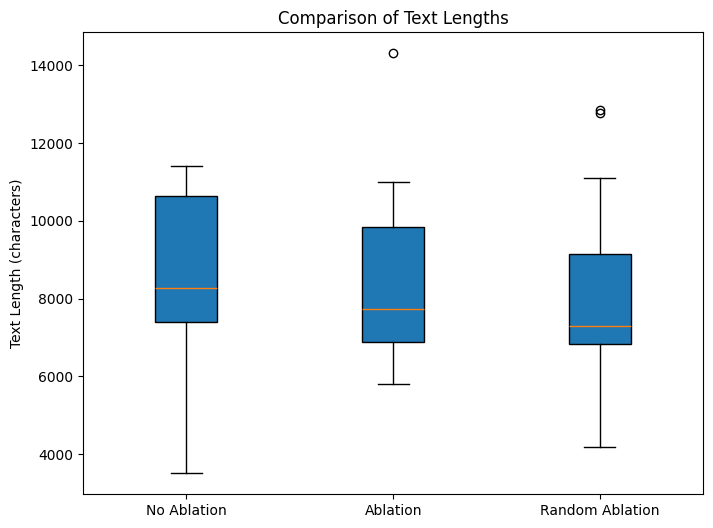

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.boxplot(
    [length_no_ablation, length_ablation, length_random_ablation],
    labels=['No Ablation', 'Ablation', 'Random Ablation'],
    patch_artist=True
)
plt.ylabel('Text Length (characters)')
plt.title('Comparison of Text Lengths')
plt.show()

In [12]:
random_heads = [(1, 19),
 (1, 22),
 (1, 29),
 (2, 1),
 (5, 18),
 (5, 31),
 (6, 17),
 (7, 4),
 (8, 29),
 (12, 23),
 (13, 31),
 (14, 3),
 (14, 9),
 (14, 28),
 (15, 21),
 (17, 19),
 (17, 25),
 (26, 27),
 (27, 0),
 (28, 23)]

In [13]:
reciever_heads = [(29, 24),
 (17, 0),
 (24, 7),
 (25, 22),
 (23, 8),
 (18, 12),
 (23, 23),
 (21, 4),
 (19, 17),
 (18, 14),
 (30, 17),
 (19, 27),
 (28, 22),
 (1, 17),
 (27, 1),
 (24, 1),
 (26, 10),
 (26, 24),
 (1, 16),
 (24, 5)]

In [14]:
import os

import json

def process_problem_data(base_path):

    """

    Iterates through all problem directories, extracts problem statements

    and sentences from `chunks_labeled.json`, and returns a list of dictionaries.


    Args:

        base_path (str): The path to the directory containing all the problems

                         (e.g., 'math-rollouts/.../correct_base_solution').


    Returns:

        list: A list of dictionaries, where each dictionary contains the problem

              and all sentences for a given problem directory.

    """

    all_problem_data = []


    # Check if the base path exists

    if not os.path.isdir(base_path):

        print(f"Error: The directory '{base_path}' was not found.")

        return all_problem_data

    print(f"Found problem directory: {base_path}")


    # List all entries in the base directory

    problem_dirs = [d for d in os.listdir(base_path) if os.path.isdir(os.path.join(base_path, d))]

    print(f"Found problem directory: {problem_dirs}")


    if not problem_dirs:

        print(f"No problem directories found in '{base_path}'.")

        return all_problem_data


    # Iterate through each problem directory (e.g., problem_330, problem_1591)

    for problem_name in problem_dirs:

        problem_path = os.path.join(base_path, problem_name)

       

        # Define the file paths for the problem and chunks

        problem_file = os.path.join(problem_path, "problem.json")

        chunks_file = os.path.join(problem_path, "chunks_labeled.json")

       

        problem_text = ""

        allsentences = []

       

        # Load the problem statement

        try:

            with open(problem_file, 'r') as f:

                problem_data = json.load(f)

                problem_text = problem_data.get("problem", "")
                problem_answer = problem_data.get("gt_answer", "")
                

        except (FileNotFoundError, json.JSONDecodeError) as e:

            print(f"Skipping {problem_name}: Could not load problem.json. Error: {e}")

            continue


        # Load all sentences from chunks_labeled.json

        try:

            with open(chunks_file, 'r') as f:

                chunks_data = json.load(f)

                allsentences = [chunk["chunk"] for chunk in chunks_data]

        except (FileNotFoundError, json.JSONDecodeError) as e:

            print(f"Skipping {problem_name}: Could not load chunks_labeled.json. Error: {e}")

            continue


        # Create a dictionary to store the extracted data

        problem_info = {

            "problem_id": problem_name,

            "problem_statement": problem_text,

            "sentences": allsentences,
            "answer": problem_answer

        }

        all_problem_data.append(problem_info)


    return all_problem_data

    print("No data was loaded.")




# Define the base directory for all problems

base_problem_dir = "../math-rollouts/deepseek-r1-distill-llama-8b/temperature_0.6_top_p_0.95/correct_base_solution"

# Run the function to get all the data

correct_all_prompt = process_problem_data(base_problem_dir)


# Now, `all_data` is a list of dictionaries. You can iterate through it.

print(f"Successfully loaded data for {len(correct_all_prompt)} problems.")

# Define the base directory for all problems

base_problem_dir = "../math-rollouts/deepseek-r1-distill-llama-8b/temperature_0.6_top_p_0.95/incorrect_base_solution"

# Run the function to get all the data

incorrect_all_prompt = process_problem_data(base_problem_dir)


print(f"Successfully loaded data for {len(incorrect_all_prompt)} problems.")

Found problem directory: ../math-rollouts/deepseek-r1-distill-llama-8b/temperature_0.6_top_p_0.95/correct_base_solution
Found problem directory: ['problem_6481', 'problem_4682', 'problem_3360', 'problem_4605', 'problem_2236', 'problem_1591', 'problem_4164', 'problem_2189', 'problem_2238', 'problem_3935', 'problem_6596', 'problem_3550', 'problem_2870', 'problem_4019', 'problem_2050', 'problem_6998', 'problem_3916', 'problem_2137', 'problem_3448', 'problem_330']
Successfully loaded data for 20 problems.
Found problem directory: ../math-rollouts/deepseek-r1-distill-llama-8b/temperature_0.6_top_p_0.95/incorrect_base_solution
Found problem directory: ['problem_4019', 'problem_2870', 'problem_3550', 'problem_3935', 'problem_6596', 'problem_2238', 'problem_2189', 'problem_4164', 'problem_1591', 'problem_2236', 'problem_4605', 'problem_3360', 'problem_6481', 'problem_4682', 'problem_3448', 'problem_2137', 'problem_330', 'problem_6998', 'problem_3916', 'problem_2050']
Successfully loaded data f

In [15]:
all_prompt = correct_all_prompt[:2] + incorrect_all_prompt[:2]

In [16]:
#text before rollouts
problem_text =all_prompt[0]["problem_statement"]
allsentences = all_prompt[0]["sentences"]
prefix_text = allsentences[:186]
context_without = problem_text + " " + " ".join(prefix_text) + ""

In [17]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, BitsAndBytesConfig, AutoModelForCausalLM, pipeline

import torch


model_name = "deepseek-ai/DeepSeek-R1-Distill-Llama-8B" # Or any other suitable model

mname = model_name

tokenizer = AutoTokenizer.from_pretrained(model_name)

# Important: Add a pad token if the tokenizer doesn't have one, especially for decoder models.

if tokenizer.pad_token is None:

    tokenizer.add_special_tokens({'pad_token': tokenizer.eos_token})

In [18]:
model = AutoModelForCausalLM.from_pretrained(model_name, output_attentions=True, torch_dtype=torch.bfloat16, device_map="auto")

The following generation flags are not valid and may be ignored: ['output_attentions']. Set `TRANSFORMERS_VERBOSITY=info` for more details.
The following generation flags are not valid and may be ignored: ['output_attentions']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [19]:
import torch
from nnsight import LanguageModel
from transformers import LlamaForCausalLM, AutoTokenizer
import math

# --- Configuration (unchanged) ---
# Assuming Llama-7B: Hidden Size 4096 / 32 Heads = 128
HEAD_DIM = 4096 // 32
# The lists of heads (layer, head)
reciever_heads = [(29, 24), (17, 0), (24, 7), (25, 22), (23, 8), (18, 12), (23, 23), (21, 4), (19, 17), (18, 14), (30, 17), (19, 27), (28, 22), (1, 17), (27, 1), (24, 1), (26, 10), (26, 24), (1, 16), (24, 5)]
random_heads = [(1, 19), (1, 22), (1, 29), (2, 1), (5, 18), (5, 31), (6, 17), (7, 4), (8, 29), (12, 23), (13, 31), (14, 3), (14, 9), (14, 28), (15, 21), (17, 19), (17, 25), (26, 27), (27, 0), (28, 23)]
all_heads_to_check = set(reciever_heads + random_heads)

In [20]:
reciever_heads_sorted = sorted(reciever_heads, key=lambda x: x[0])
print(reciever_heads_sorted)

[(1, 17), (1, 16), (17, 0), (18, 12), (18, 14), (19, 17), (19, 27), (21, 4), (23, 8), (23, 23), (24, 7), (24, 1), (24, 5), (25, 22), (26, 10), (26, 24), (27, 1), (28, 22), (29, 24), (30, 17)]


In [21]:
all_heads_to_check_sorted = sorted(all_heads_to_check, key=lambda x: x[0])

In [22]:
heads_by_layer = {}
for head_tuple in all_heads_to_check_sorted:
    layer, head = head_tuple
    if layer not in heads_by_layer:
        heads_by_layer[layer] = []
    heads_by_layer[layer].append(head_tuple)

In [23]:
heads_by_layer

{1: [(1, 17), (1, 29), (1, 19), (1, 22), (1, 16)],
 2: [(2, 1)],
 5: [(5, 31), (5, 18)],
 6: [(6, 17)],
 7: [(7, 4)],
 8: [(8, 29)],
 12: [(12, 23)],
 13: [(13, 31)],
 14: [(14, 28), (14, 3), (14, 9)],
 15: [(15, 21)],
 17: [(17, 0), (17, 19), (17, 25)],
 18: [(18, 12), (18, 14)],
 19: [(19, 27), (19, 17)],
 21: [(21, 4)],
 23: [(23, 8), (23, 23)],
 24: [(24, 5), (24, 7), (24, 1)],
 25: [(25, 22)],
 26: [(26, 24), (26, 27), (26, 10)],
 27: [(27, 1), (27, 0)],
 28: [(28, 23), (28, 22)],
 29: [(29, 24)],
 30: [(30, 17)]}

In [24]:
import inspect



#confirming the forward function of self attention


print(inspect.getsource(model.model.layers[0].self_attn.forward))

    def forward(
        self,
        hidden_states: torch.Tensor,
        position_embeddings: tuple[torch.Tensor, torch.Tensor],
        attention_mask: Optional[torch.Tensor],
        past_key_value: Optional[Cache] = None,
        cache_position: Optional[torch.LongTensor] = None,
        **kwargs: Unpack[TransformersKwargs],
    ) -> tuple[torch.Tensor, torch.Tensor]:
        input_shape = hidden_states.shape[:-1]
        hidden_shape = (*input_shape, -1, self.head_dim)

        query_states = self.q_proj(hidden_states).view(hidden_shape).transpose(1, 2)
        key_states = self.k_proj(hidden_states).view(hidden_shape).transpose(1, 2)
        value_states = self.v_proj(hidden_states).view(hidden_shape).transpose(1, 2)

        cos, sin = position_embeddings
        query_states, key_states = apply_rotary_pos_emb(query_states, key_states, cos, sin)

        if past_key_value is not None:
            # sin and cos are specific to RoPE models; cache_position needed for the static c

In [25]:
import nnsight

from einops import rearrange

from nnsight import LanguageModel


llm = LanguageModel(model, tokenizer=tokenizer,device_map="auto")


In [26]:
model.model.layers[0].self_attn

LlamaAttention(
  (q_proj): Linear(in_features=4096, out_features=4096, bias=False)
  (k_proj): Linear(in_features=4096, out_features=1024, bias=False)
  (v_proj): Linear(in_features=4096, out_features=1024, bias=False)
  (o_proj): Linear(in_features=4096, out_features=4096, bias=False)
)

In [31]:
import torch.nn as nn
def repeat_kv(hidden_states: torch.Tensor, n_rep: int) -> torch.Tensor:
    """
    Repeat key/value heads to match the number of query heads.
    Args:
        hidden_states: (batch, num_key_value_heads, seqlen, head_dim)
        n_rep: number of times to repeat each KV head
    Returns:
        (batch, num_key_value_heads * n_rep, seqlen, head_dim)
    """
    batch, num_key_value_heads, slen, head_dim = hidden_states.shape
    if n_rep == 1:
        return hidden_states
    hidden_states = hidden_states[:, :, None, :, :].expand(batch, num_key_value_heads, n_rep, slen, head_dim)
    return hidden_states.reshape(batch, num_key_value_heads * n_rep, slen, head_dim)

def custom_attention_forward(query, key, hidden_states_dict, layer_idx, head_idx, dropout=0.0):
    """
    Custom forward hook for attention to extract attn_output and attn_probs for a specific head.
    Stores results in hidden_states_dict[(layer_idx, head_idx)].
    """
    
    batch_size, seq_len, hidden_dim = query.shape
    num_heads = 32
    head_dim = hidden_dim // num_heads

    # Key/value groups
    kv_dim = key.shape[-1]
    num_key_value_heads = kv_dim // head_dim
    num_key_value_groups = num_heads // num_key_value_heads

    # Reshape Q/K/V to (batch, heads, seq, head_dim)
    query = query.view(batch_size, seq_len, num_heads, head_dim).transpose(1, 2)
    key = key.view(batch_size, seq_len, num_key_value_heads, head_dim).transpose(1, 2)

    # value = value_.view(batch_size, seq_len, num_key_value_heads, head_dim).transpose(1, 2)

    # Repeat K/V heads to match Q heads
    key = repeat_kv(key, num_key_value_groups)
    # value = repeat_kv(value, num_key_value_groups)

    scaling = float(head_dim) ** -0.5
    attn_weights = torch.matmul(query, key.transpose(2, 3)) * scaling
    attn_weights = nn.functional.softmax(attn_weights, dim=-1, dtype=torch.float32).to(query.dtype)
    attn_weights = nn.functional.dropout(attn_weights, p=dropout, training=False)
    # attn_output = torch.matmul(attn_weights, value)
    # attn_output = attn_output.transpose(1, 2).contiguous()  # (batch, seq, heads, head_dim)

    # Save only the selected head
    hidden_states_dict[(layer_idx, head_idx)] = {
        # "attn_output": attn_output[:, :, head_idx, :].detach().cpu().to(torch.float32),  # (batch, seq, head_dim)
        "attn_probs": attn_weights[:, head_idx, :, :].detach().cpu().to(torch.float32)    # (batch, seq, seq)
    }
    # return output

In [32]:
attn_probs_by_head_nn = {}

In [38]:
heads_by_layer

{1: [(1, 17), (1, 29), (1, 19), (1, 22), (1, 16)],
 2: [(2, 1)],
 5: [(5, 31), (5, 18)],
 6: [(6, 17)],
 7: [(7, 4)],
 8: [(8, 29)],
 12: [(12, 23)],
 13: [(13, 31)],
 14: [(14, 28), (14, 3), (14, 9)],
 15: [(15, 21)],
 17: [(17, 0), (17, 19), (17, 25)],
 18: [(18, 12), (18, 14)],
 19: [(19, 27), (19, 17)],
 21: [(21, 4)],
 23: [(23, 8), (23, 23)],
 24: [(24, 5), (24, 7), (24, 1)],
 25: [(25, 22)],
 26: [(26, 24), (26, 27), (26, 10)],
 27: [(27, 1), (27, 0)],
 28: [(28, 23), (28, 22)],
 29: [(29, 24)],
 30: [(30, 17)]}

In [ ]:
with llm.trace("The Eiffel Tower is in the city of"):
    # Process each layer separately
    for layer in sorted(heads_by_layer.keys()):
        attn = llm.model.layers[layer].self_attn
        
        for head_tuple in heads_by_layer[layer]:
            # Get q_proj and k_proj outputs for all heads in this layer
            head = head_tuple[1]
            q_proj = attn.q_proj.output
            k_proj = attn.k_proj.output
            custom_attention_forward(q_proj, k_proj, attn_probs_by_head_nn, layer, head)

In [37]:
HEAD_DIM = 4096 // 32 # hidden dim is 4096
head_outputs = {}
with llm.trace("The Eiffel Tower is in the city of"):
    # 1. Ablate every head in reciever_heads
    for head_tuple in all_heads_to_check_sorted:
        layer, head = head_tuple
        slice_start = head * HEAD_DIM
        slice_end = (head + 1) * HEAD_DIM
        attn = llm.model.layers[layer].self_attn
        if head_tuple in reciever_heads_sorted:
            slice_end = (head + 1) * HEAD_DIM

            attn_output = attn.o_proj.output
            batch_size, seq_len, hidden_dim = attn_output.shape
            print(f"Ablating Layer {layer}, Head {head} with output shape {attn_output.shape}")

            # Use einops to reshape, ablate, and reshape back
            reshaped = rearrange(attn_output, 'b s (h d) -> b s h d', h=32)
            reshaped[:, :, head, :] = 0
            attn_output[:] = rearrange(reshaped, 'b s h d -> b s (h d)')


        head_outputs[head_tuple] = llm.model.layers[layer].self_attn.o_proj.output[:, :, slice_start:slice_end].save()

Ablating Layer 1, Head 17 with output shape torch.Size([1, 11, 4096])
Ablating Layer 1, Head 16 with output shape torch.Size([1, 11, 4096])
Ablating Layer 17, Head 0 with output shape torch.Size([1, 11, 4096])
Ablating Layer 18, Head 12 with output shape torch.Size([1, 11, 4096])
Ablating Layer 18, Head 14 with output shape torch.Size([1, 11, 4096])
Ablating Layer 19, Head 27 with output shape torch.Size([1, 11, 4096])
Ablating Layer 19, Head 17 with output shape torch.Size([1, 11, 4096])
Ablating Layer 21, Head 4 with output shape torch.Size([1, 11, 4096])
Ablating Layer 23, Head 8 with output shape torch.Size([1, 11, 4096])
Ablating Layer 23, Head 23 with output shape torch.Size([1, 11, 4096])
Ablating Layer 24, Head 5 with output shape torch.Size([1, 11, 4096])
Ablating Layer 24, Head 7 with output shape torch.Size([1, 11, 4096])
Ablating Layer 24, Head 1 with output shape torch.Size([1, 11, 4096])
Ablating Layer 25, Head 22 with output shape torch.Size([1, 11, 4096])
Ablating Layer

In [52]:
inputs = tokenizer("The Eiffel Tower is in the city of", return_tensors="pt", truncation=True)
inputs = {k: v.to(model.device) for k, v in inputs.items()}

In [53]:
with torch.no_grad():
    outputs = model(**inputs, output_attentions=True)
    attn_probs_by_head = outputs.attentions

In [54]:
attn_probs_by_head

(tensor([[[[1.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00,
            0.0000e+00, 0.0000e+00],
           [9.4141e-01, 5.8350e-02, 0.0000e+00,  ..., 0.0000e+00,
            0.0000e+00, 0.0000e+00],
           [8.5156e-01, 1.3672e-01, 1.1963e-02,  ..., 0.0000e+00,
            0.0000e+00, 0.0000e+00],
           ...,
           [1.9629e-01, 1.1377e-01, 4.7852e-02,  ..., 5.0049e-02,
            0.0000e+00, 0.0000e+00],
           [1.7871e-01, 3.6865e-02, 2.4414e-02,  ..., 1.0205e-01,
            7.5684e-03, 0.0000e+00],
           [1.2256e-01, 3.5645e-02, 1.8433e-02,  ..., 1.9238e-01,
            3.5400e-02, 2.2095e-02]],
 
          [[1.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00,
            0.0000e+00, 0.0000e+00],
           [8.5156e-01, 1.5039e-01, 0.0000e+00,  ..., 0.0000e+00,
            0.0000e+00, 0.0000e+00],
           [5.6250e-01, 2.3047e-01, 2.0703e-01,  ..., 0.0000e+00,
            0.0000e+00, 0.0000e+00],
           ...,
           [7.7637e-02, 3.2349e-03, 4.

In [55]:
# Extract attention probabilities for specific heads
specific_head_attentions = {}

for layer_idx, head_idx in all_heads_to_check_sorted:
    # attn_probs_by_head is a tuple of attention tensors, one per layer
    # Each tensor has shape (batch_size, num_heads, seq_len, seq_len)
    layer_attention = attn_probs_by_head[layer_idx]  # Shape: (1, 32, seq_len, seq_len)
    head_attention = layer_attention[0, head_idx, :, :]  # Shape: (seq_len, seq_len)
    
    specific_head_attentions[(layer_idx, head_idx)] = head_attention.detach().cpu().to(torch.float32)

# Now you can visualize or analyze these specific heads
print(f"Extracted attention for {len(specific_head_attentions)} heads")
for head_key in list(specific_head_attentions.keys()):  # Show first 5
    print(f"Head {head_key}: {specific_head_attentions[head_key].shape}")

Extracted attention for 40 heads
Head (1, 17): torch.Size([11, 11])
Head (1, 29): torch.Size([11, 11])
Head (1, 19): torch.Size([11, 11])
Head (1, 22): torch.Size([11, 11])
Head (1, 16): torch.Size([11, 11])
Head (2, 1): torch.Size([11, 11])
Head (5, 31): torch.Size([11, 11])
Head (5, 18): torch.Size([11, 11])
Head (6, 17): torch.Size([11, 11])
Head (7, 4): torch.Size([11, 11])
Head (8, 29): torch.Size([11, 11])
Head (12, 23): torch.Size([11, 11])
Head (13, 31): torch.Size([11, 11])
Head (14, 28): torch.Size([11, 11])
Head (14, 3): torch.Size([11, 11])
Head (14, 9): torch.Size([11, 11])
Head (15, 21): torch.Size([11, 11])
Head (17, 0): torch.Size([11, 11])
Head (17, 19): torch.Size([11, 11])
Head (17, 25): torch.Size([11, 11])
Head (18, 12): torch.Size([11, 11])
Head (18, 14): torch.Size([11, 11])
Head (19, 27): torch.Size([11, 11])
Head (19, 17): torch.Size([11, 11])
Head (21, 4): torch.Size([11, 11])
Head (23, 8): torch.Size([11, 11])
Head (23, 23): torch.Size([11, 11])
Head (24, 5):

In [65]:
specific_head_attentions[(1,17)]

tensor([[1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [9.9609e-01, 5.4321e-03, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [9.7656e-01, 2.3315e-02, 7.3624e-04, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [9.5703e-01, 3.0762e-02, 7.2937e-03, 5.0964e-03, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [9.8047e-01, 9.4604e-03, 7.9346e-03, 3.6469e-03, 2.7275e-04, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [9.2969e-01, 1.0803e-02, 2.6489e-02, 2.9419e-02, 5.3406e-03, 3.5524e-05,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [8.2422e-01, 4.5410e-02, 7.9956e-03, 5.2002e-02, 6.0303e-02, 5.2490e-03,
         6.83

In [63]:
attn_probs_by_head_nn[(1,17)]['attn_probs'][0]

tensor([[3.0664e-01, 9.0332e-02, 4.9805e-02, 7.3242e-02, 6.3965e-02, 4.5166e-02,
         8.1543e-02, 6.6895e-02, 7.6172e-02, 5.7373e-02, 8.8867e-02],
        [9.8047e-01, 5.0659e-03, 2.8610e-04, 1.9226e-03, 1.5488e-03, 4.8637e-04,
         3.1281e-03, 2.1820e-03, 1.5945e-03, 6.2561e-04, 2.4719e-03],
        [9.7656e-01, 2.1515e-03, 7.2098e-04, 4.4861e-03, 4.7913e-03, 1.0529e-03,
         2.2278e-03, 1.3046e-03, 9.2697e-04, 9.0027e-04, 3.1891e-03],
        [9.7656e-01, 2.0599e-03, 4.5967e-04, 5.0964e-03, 5.1880e-03, 1.7624e-03,
         1.9989e-03, 1.3733e-03, 1.0681e-03, 1.1368e-03, 1.7624e-03],
        [1.0000e+00, 5.2214e-05, 4.4107e-06, 1.4687e-04, 2.9182e-04, 4.9114e-05,
         8.6308e-05, 2.8849e-05, 3.4809e-05, 3.4809e-05, 4.4584e-05],
        [1.0000e+00, 6.1989e-05, 1.9968e-06, 1.0204e-04, 1.9073e-04, 3.7670e-05,
         7.7248e-05, 1.7762e-05, 2.7537e-05, 3.1233e-05, 1.0204e-04],
        [9.7656e-01, 1.6632e-03, 5.0306e-05, 7.6294e-04, 9.7656e-04, 2.1839e-04,
         8.05

In [42]:
import seaborn as sns

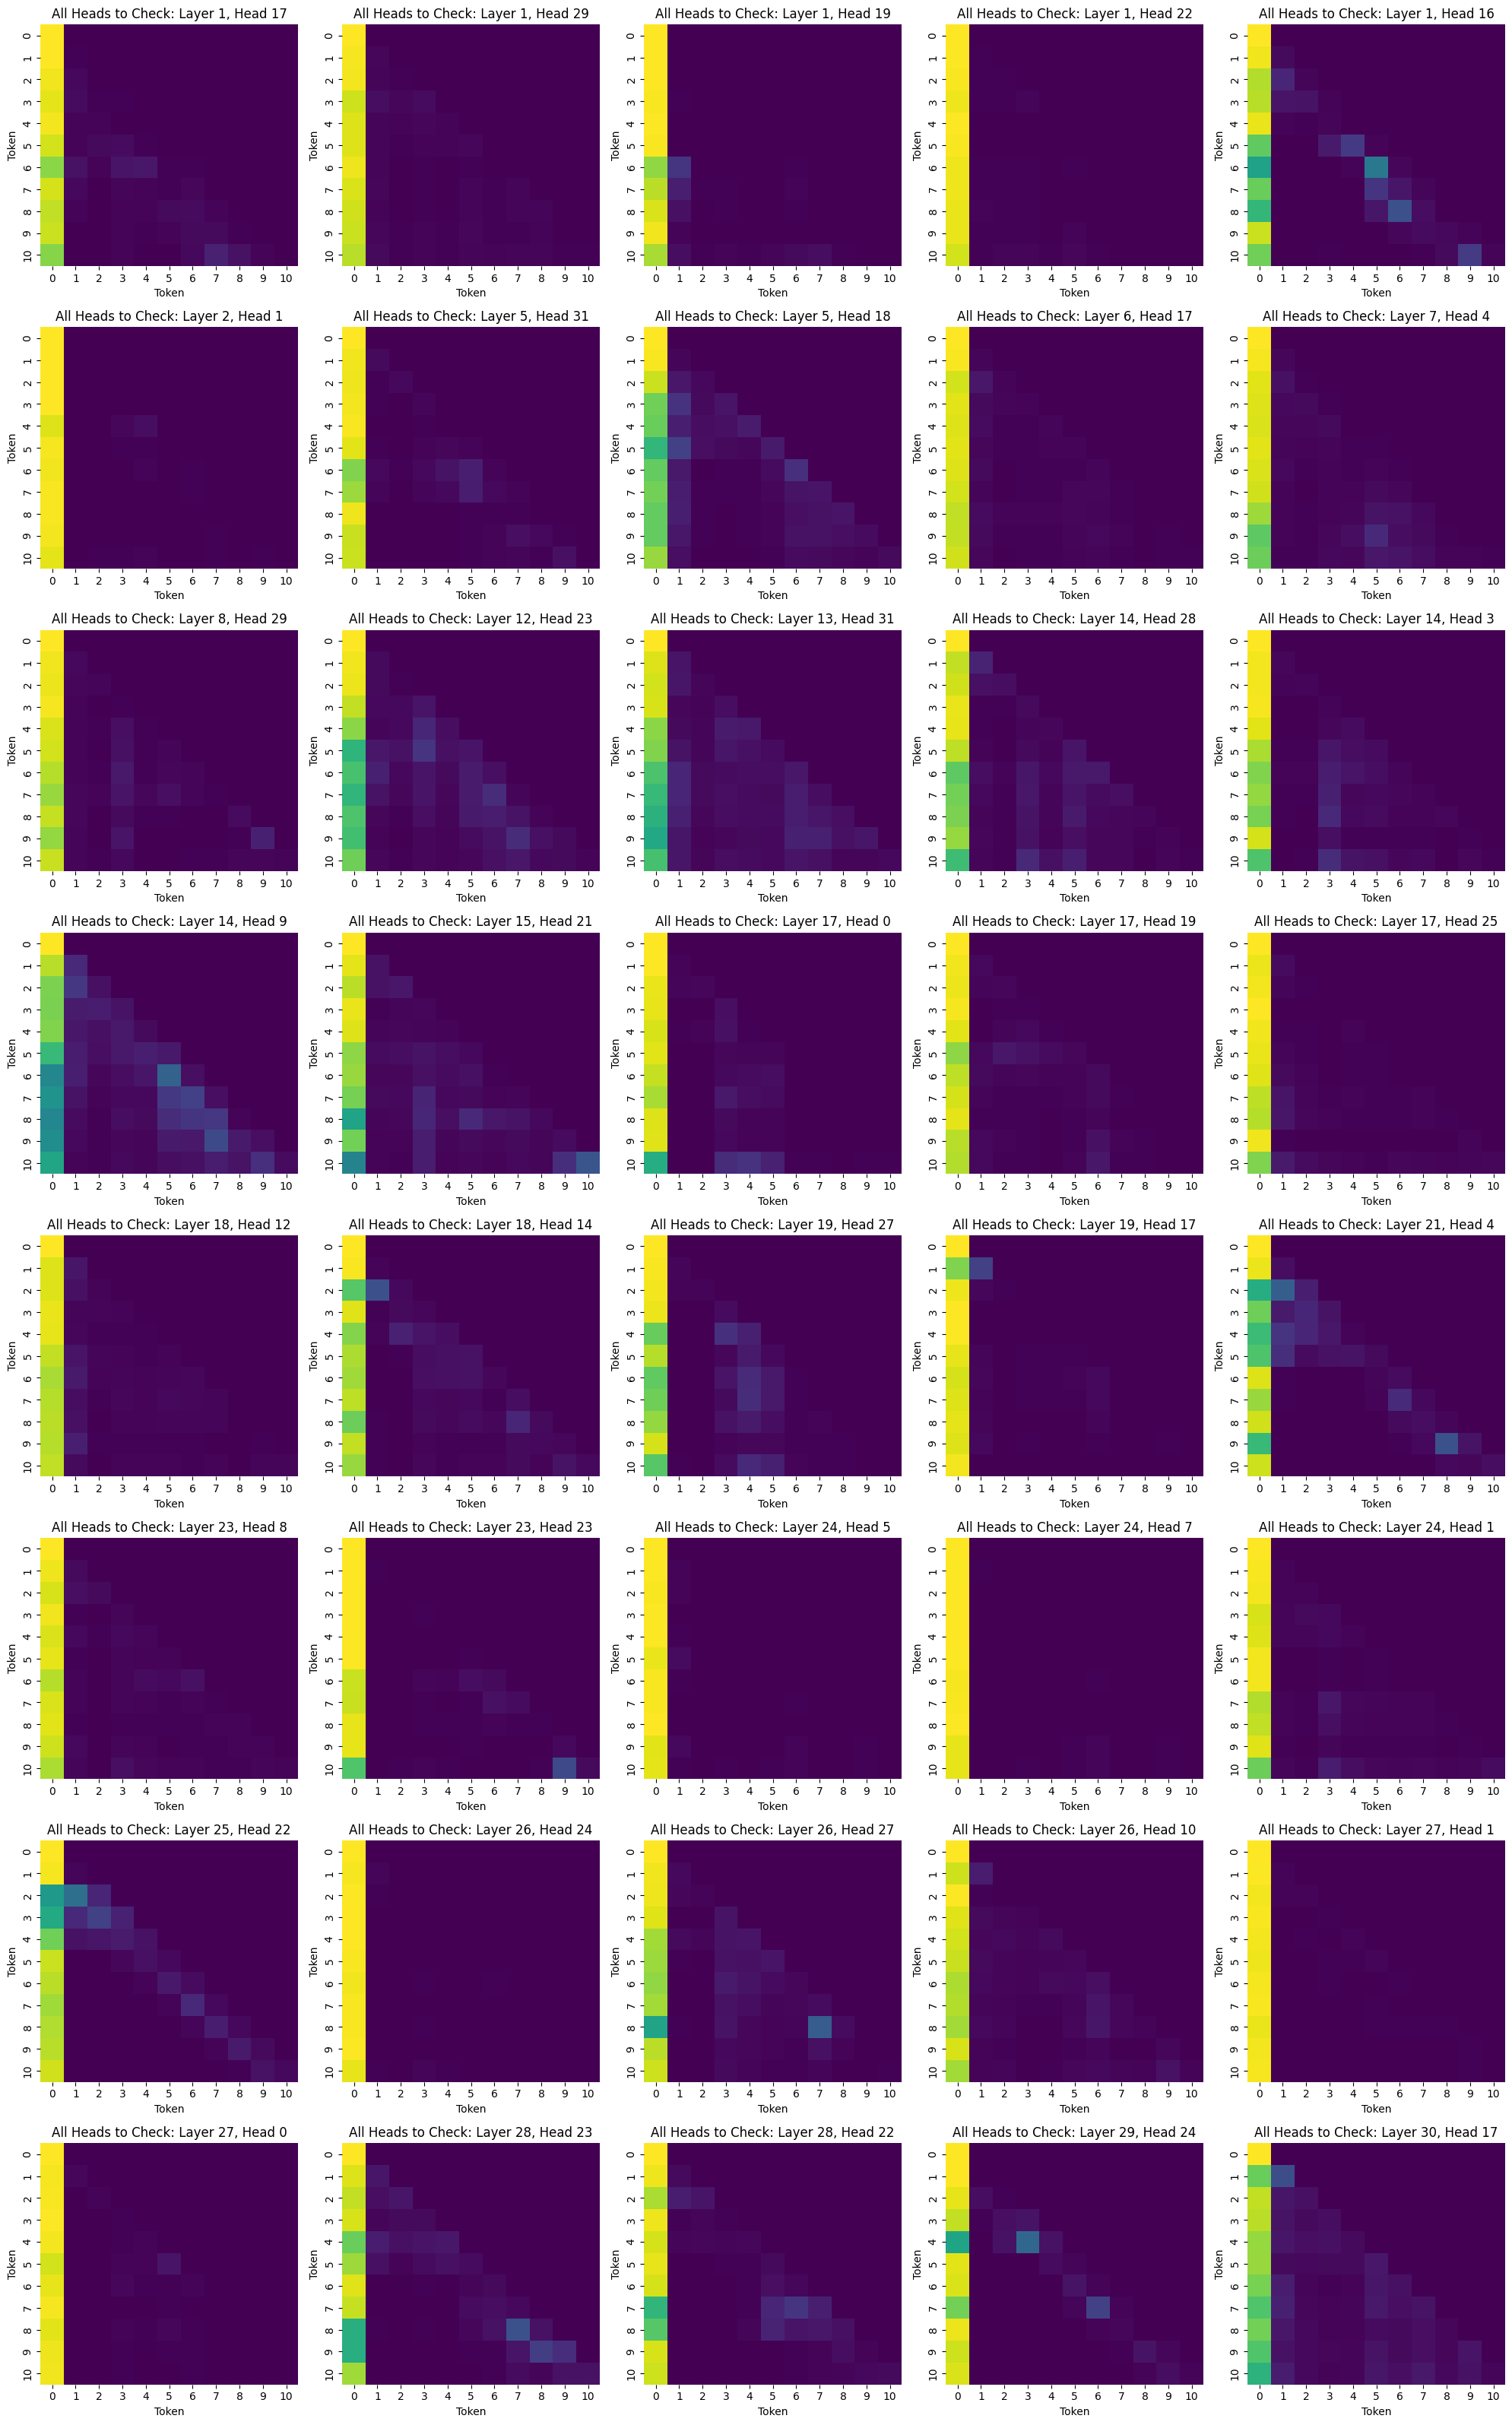

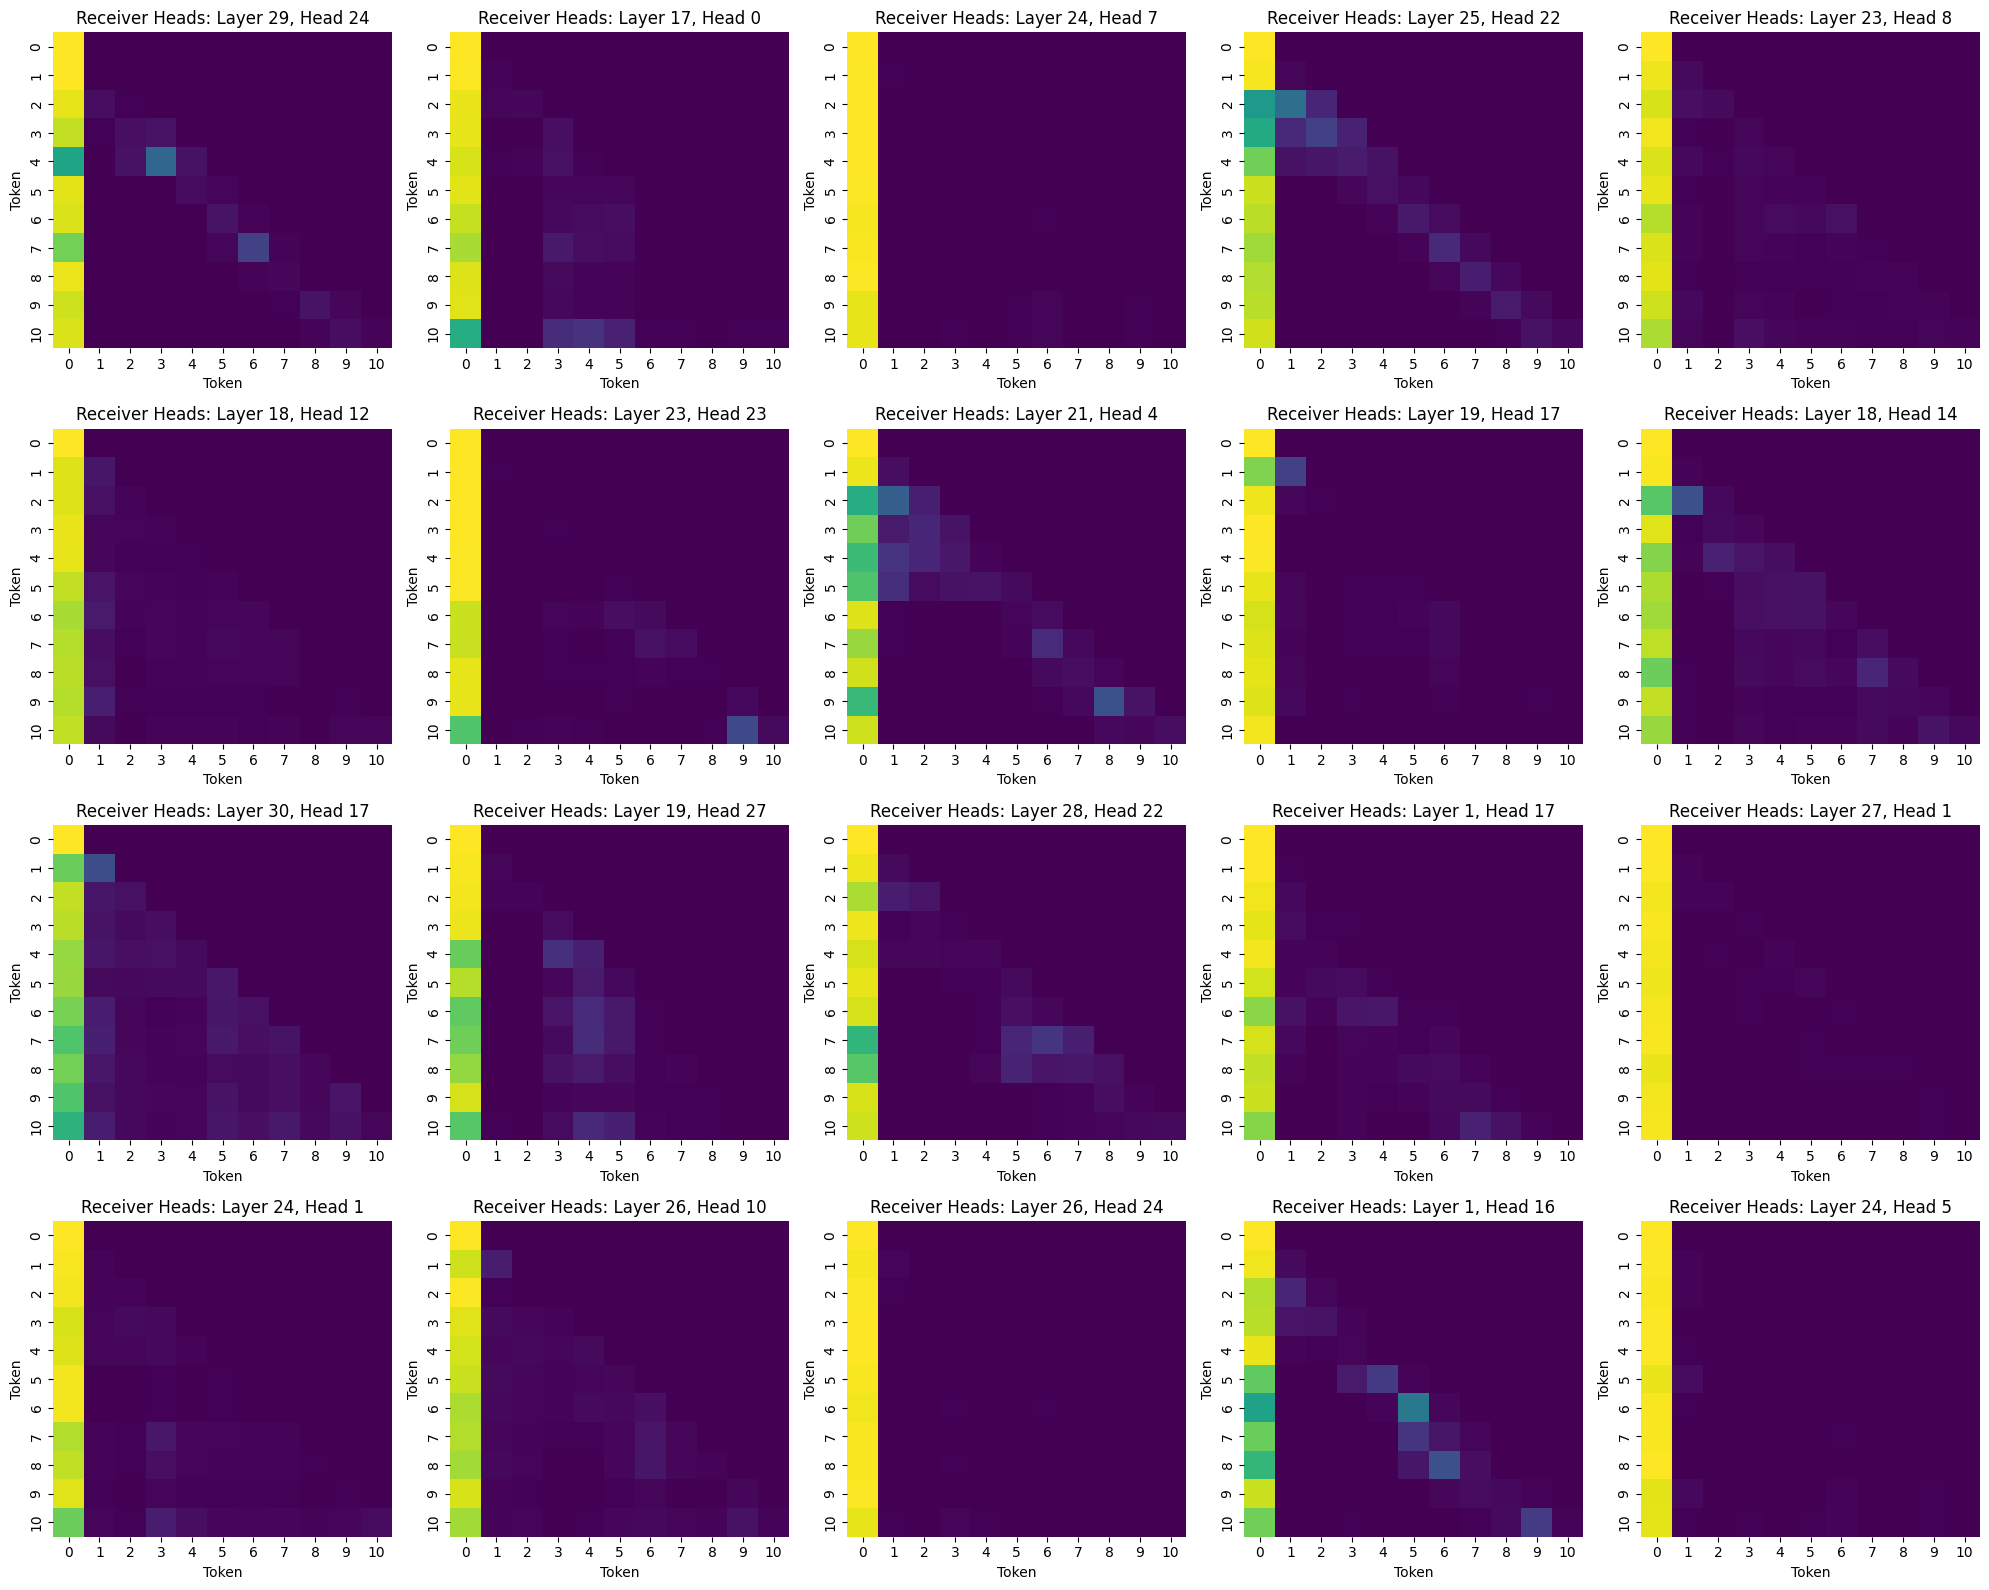

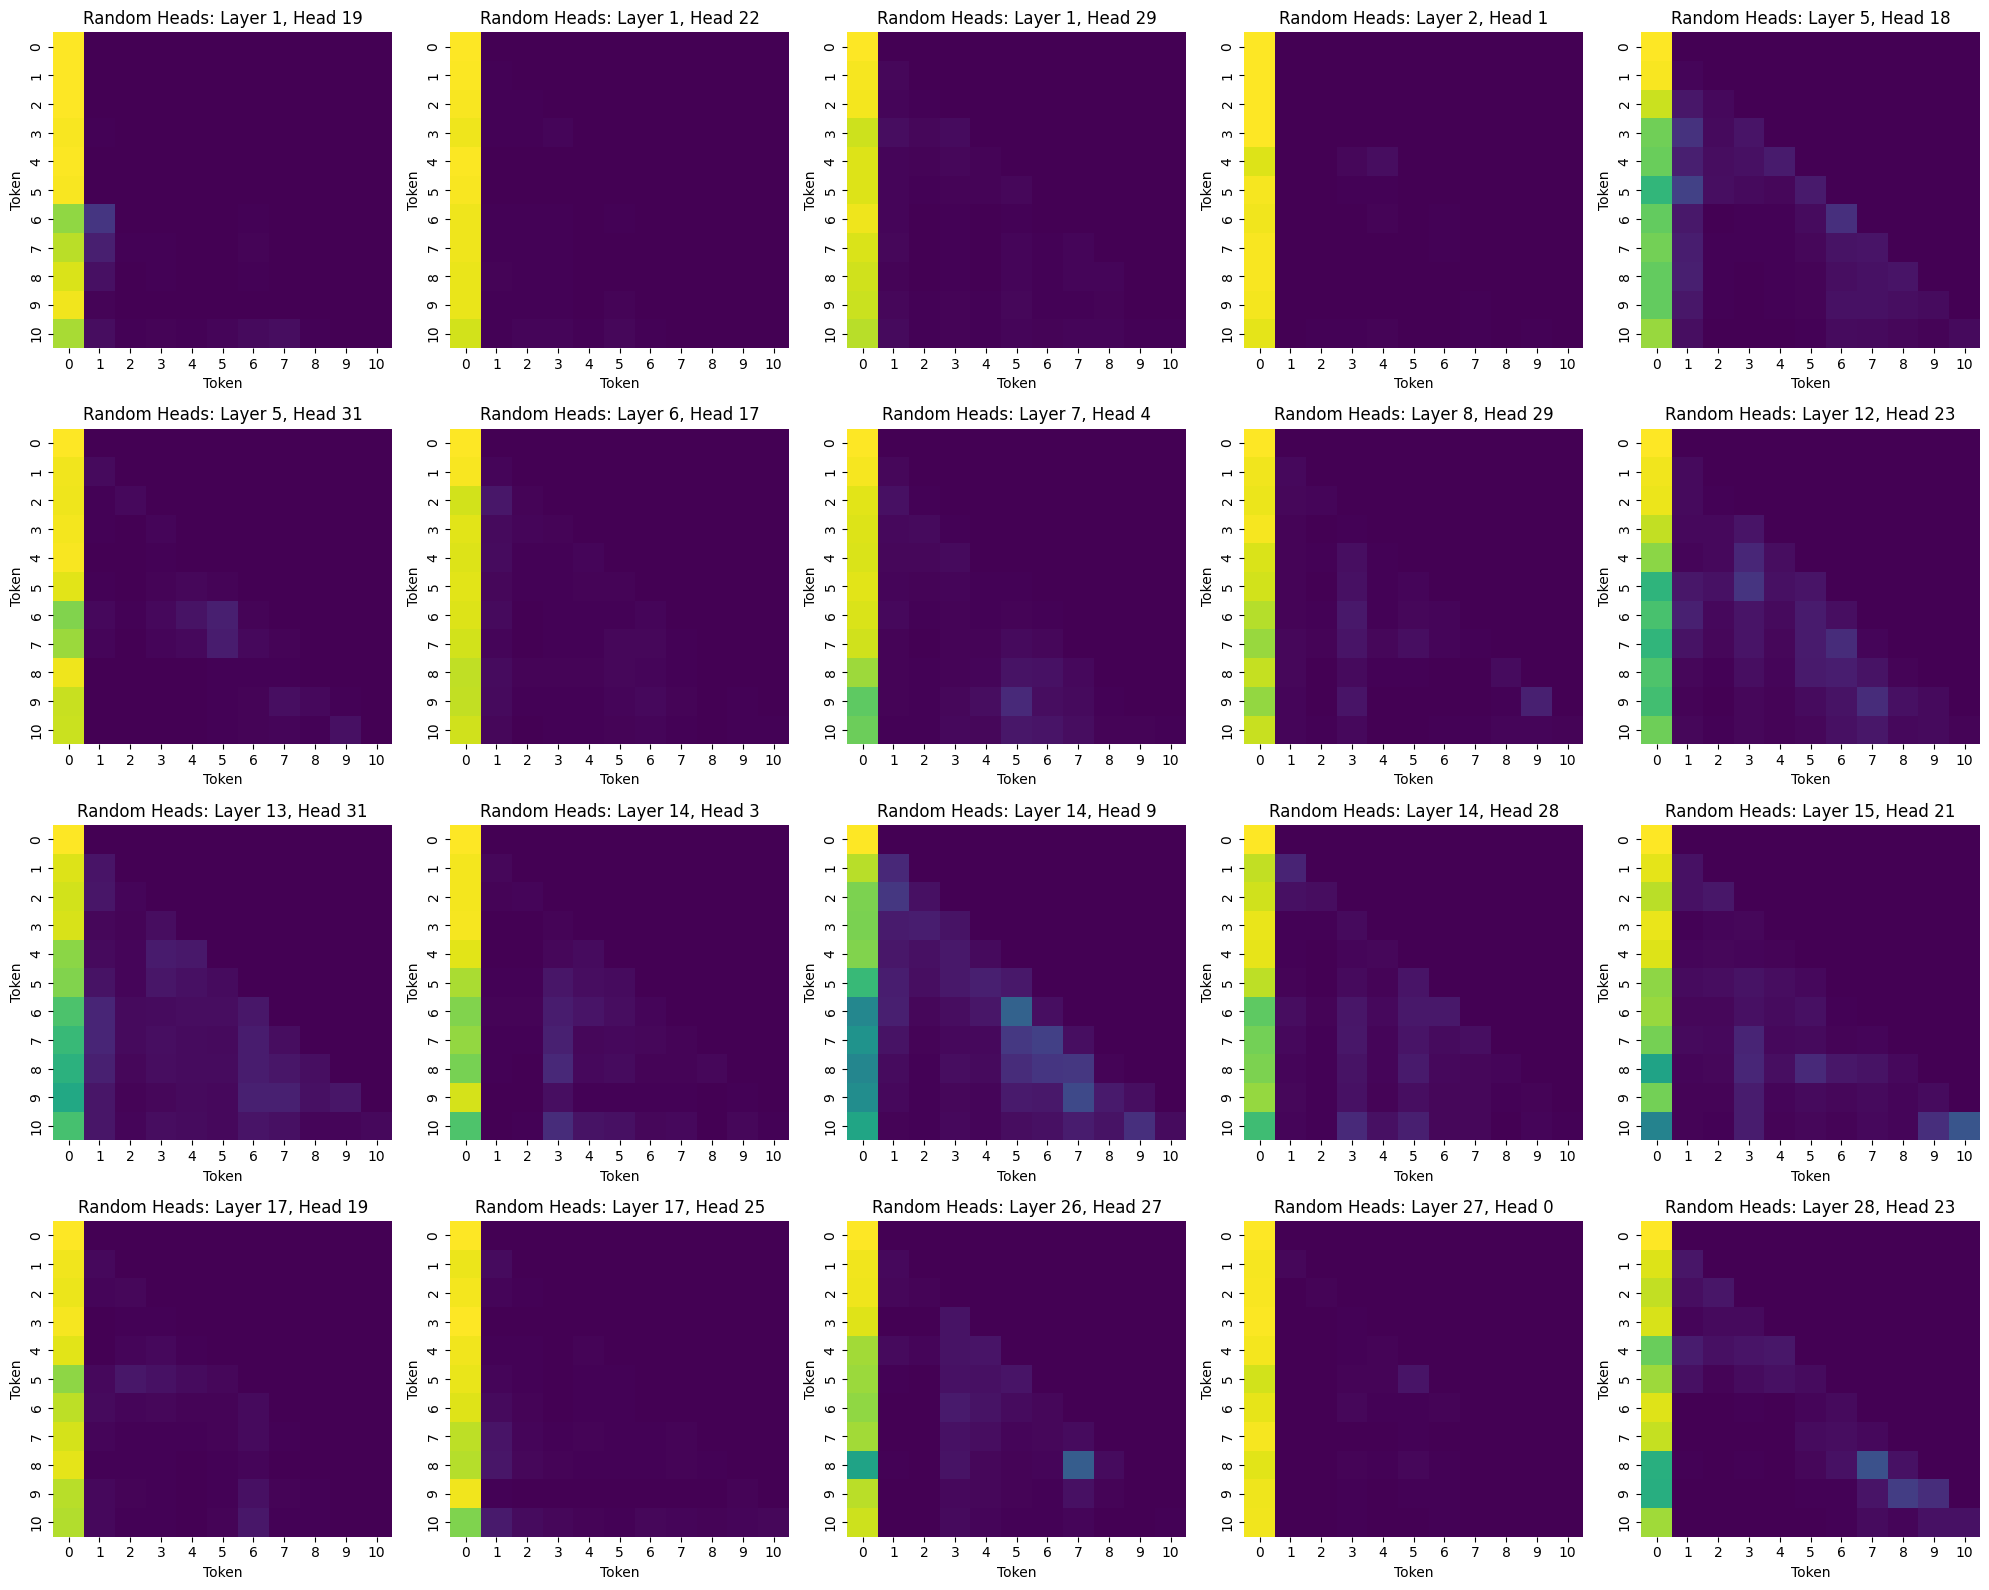

In [43]:
# Visualize the specific heads using your existing plot function
def plot_specific_heads_attention(specific_head_attentions, head_list, title_prefix=""):
    num_heads = len(head_list)
    ncols = 5
    nrows = (num_heads + ncols - 1) // ncols
    fig, axes = plt.subplots(nrows, ncols, figsize=(4*ncols, 4*nrows))
    axes = axes.flatten()
    
    for idx, (layer, head) in enumerate(head_list):
        if (layer, head) in specific_head_attentions:
            attn = specific_head_attentions[(layer, head)].numpy()
            attn = attn[:50, :50]  # first 50 tokens for clarity
            sns.heatmap(attn, ax=axes[idx], cmap='viridis', cbar=False)
            axes[idx].set_title(f"{title_prefix}Layer {layer}, Head {head}")
        else:
            axes[idx].set_title(f"{title_prefix}Layer {layer}, Head {head}\n(No Data)")
            axes[idx].axis('off')
        axes[idx].set_xlabel('Token')
        axes[idx].set_ylabel('Token')
    
    # Hide unused subplots
    for j in range(idx+1, len(axes)):
        axes[j].axis('off')
    plt.tight_layout()
    plt.show()

# Plot all heads to check
plot_specific_heads_attention(specific_head_attentions, all_heads_to_check_sorted, "All Heads to Check: ")

# Or separate receiver and random heads
plot_specific_heads_attention(specific_head_attentions, reciever_heads, "Receiver Heads: ")
plot_specific_heads_attention(specific_head_attentions, random_heads, "Random Heads: ")

In [ ]:
HEAD_DIM = 4096 // 32 # hidden dim is 4096
head_outputs = {}
with llm.trace("The Eiffel Tower is in the city of"):
    # 1. Ablate every head in reciever_heads
    for head_tuple in all_heads_to_check_sorted:
        layer, head = head_tuple
        slice_start = head * HEAD_DIM
        slice_end = (head + 1) * HEAD_DIM
        attn = llm.model.layers[layer].self_attn
        q_proj = attn.q_proj.output
        k_proj = attn.k_proj.output
        

        # print(f"Q_proj shape: {q_proj.weight.shape}, K_proj shape: {k_proj.weight.shape}")


        #ablation_code
        if head_tuple in reciever_heads_sorted:
            slice_end = (head + 1) * HEAD_DIM

            attn_output = attn.o_proj.output
            batch_size, seq_len, hidden_dim = attn_output.shape
            print(f"Ablating Layer {layer}, Head {head} with output shape {attn_output.shape}")
            reshaped = rearrange(attn_output, 'b s (h d) -> b s h d', h=32)
            reshaped[:, :, head, :] = 0
            attn_output[:] = rearrange(reshaped, 'b s h d -> b s (h d)')
     


        head_outputs[head_tuple] = llm.model.layers[layer].self_attn.o_proj.output[:, :, slice_start:slice_end].save()

tensor([[[ 0.0201,  0.0135,  0.0435,  ...,  0.1650, -0.2461, -0.3125],
         [ 0.7656, -0.8594, -0.9492,  ..., -0.9961, -1.0312, -1.3906],
         [ 0.7969,  0.0369, -0.5781,  ..., -0.9844, -1.3281, -1.2578],
         ...,
         [ 0.4121, -0.3535, -0.6172,  ..., -0.7852, -0.9375, -1.1562],
         [ 0.2168, -0.4824, -1.1641,  ..., -0.9414, -1.3516, -1.6172],
         [ 0.2061, -1.2812, -2.0625,  ..., -0.6250, -1.1172, -1.8906]]],
       device='cuda:0', dtype=torch.bfloat16, grad_fn=<UnsafeViewBackward0>)
Ablating Layer 1, Head 17 with output shape torch.Size([1, 11, 4096])


NNsightException: 

Traceback (most recent call last):
  File "/tmp/ipykernel_1669187/314465376.py", line 12, in <module>
    q_proj = attn.q_proj.output
  File "/home/chriskino/.local/lib/python3.12/site-packages/nnsight/intervention/envoy.py", line 152, in output
    return self._interleaver.current.request(
  File "/home/chriskino/.local/lib/python3.12/site-packages/nnsight/intervention/interleaver.py", line 783, in request
    value = self.send(Events.VALUE, requester)
  File "/home/chriskino/.local/lib/python3.12/site-packages/nnsight/intervention/interleaver.py", line 768, in send
    raise response

OutOfOrderError: Value was missed for model.model.layers.1.self_attn.q_proj.output.i0. Did you call an Envoy out of order?

In [27]:
generated_text_no_ablation = sentence_rollouts_no_ablation["rollout_texts"]
generated_text_ablation = sentence_rollouts_ablation[0]["rollout_texts"]
generated_text_random_ablation = sentence_rollouts_random_ablation[0]["rollout_texts"]

In [28]:
def get_attention_all_heads(model, tokenizer, text, max_length=1024):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, max_length=max_length)
    inputs = {k: v.to(model.device) for k, v in inputs.items()}
 
    outputs = model(**inputs, output_attentions=True)
    attention = torch.stack([a[0].cpu().to(torch.float32) for a in outputs.attentions])
    del outputs
    torch.cuda.empty_cache()
    return attention

# Usage:
attention_all_heads_no_ablation = get_attention_all_heads(model, tokenizer, generated_text_no_ablation[0])

In [29]:
hidden_states_dict_after


{(1,
  17): {'attn_output': tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]]), 'attn_probs': tensor([[[1.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00,
            0.0000e+00, 0.0000e+00],
           [9.9609e-01, 2.4414e-03, 0.0000e+00,  ..., 0.0000e+00,
            0.0000e+00, 0.0000e+00],
           [9.8438e-01, 1.5991e-02, 8.2397e-04,  ..., 0.0000e+00,
            0.0000e+00, 0.0000e+00],
           ...,
           [7.9688e-01, 1.8406e-04, 4.1008e-05,  ..., 8.2397e-04,
            0.0000e+00, 0.0000e+00],
           [8.7891e-01, 3.3379e-04, 1.2159e-05,  ..., 2.1057e-03,
            1.0824e-04, 0.0000e+00],
           [7.7734e-01, 2.9325e-05, 2.8163e-06,  ..., 4.3457e-02,
            7.6294e-03, 2.0981e-04]]])},
 (1,
  29): {'attn_output': tensor([[[ 6.6757e-

In [ ]:
hidden_states_dict.keys()

In [ ]:
print(hidden_states_dict[(18,14)]["attn_output"].shape)

In [ ]:
print(hidden_states_dict[(18,14)]["attn_probs"].shape)

KeyboardInterrupt: 

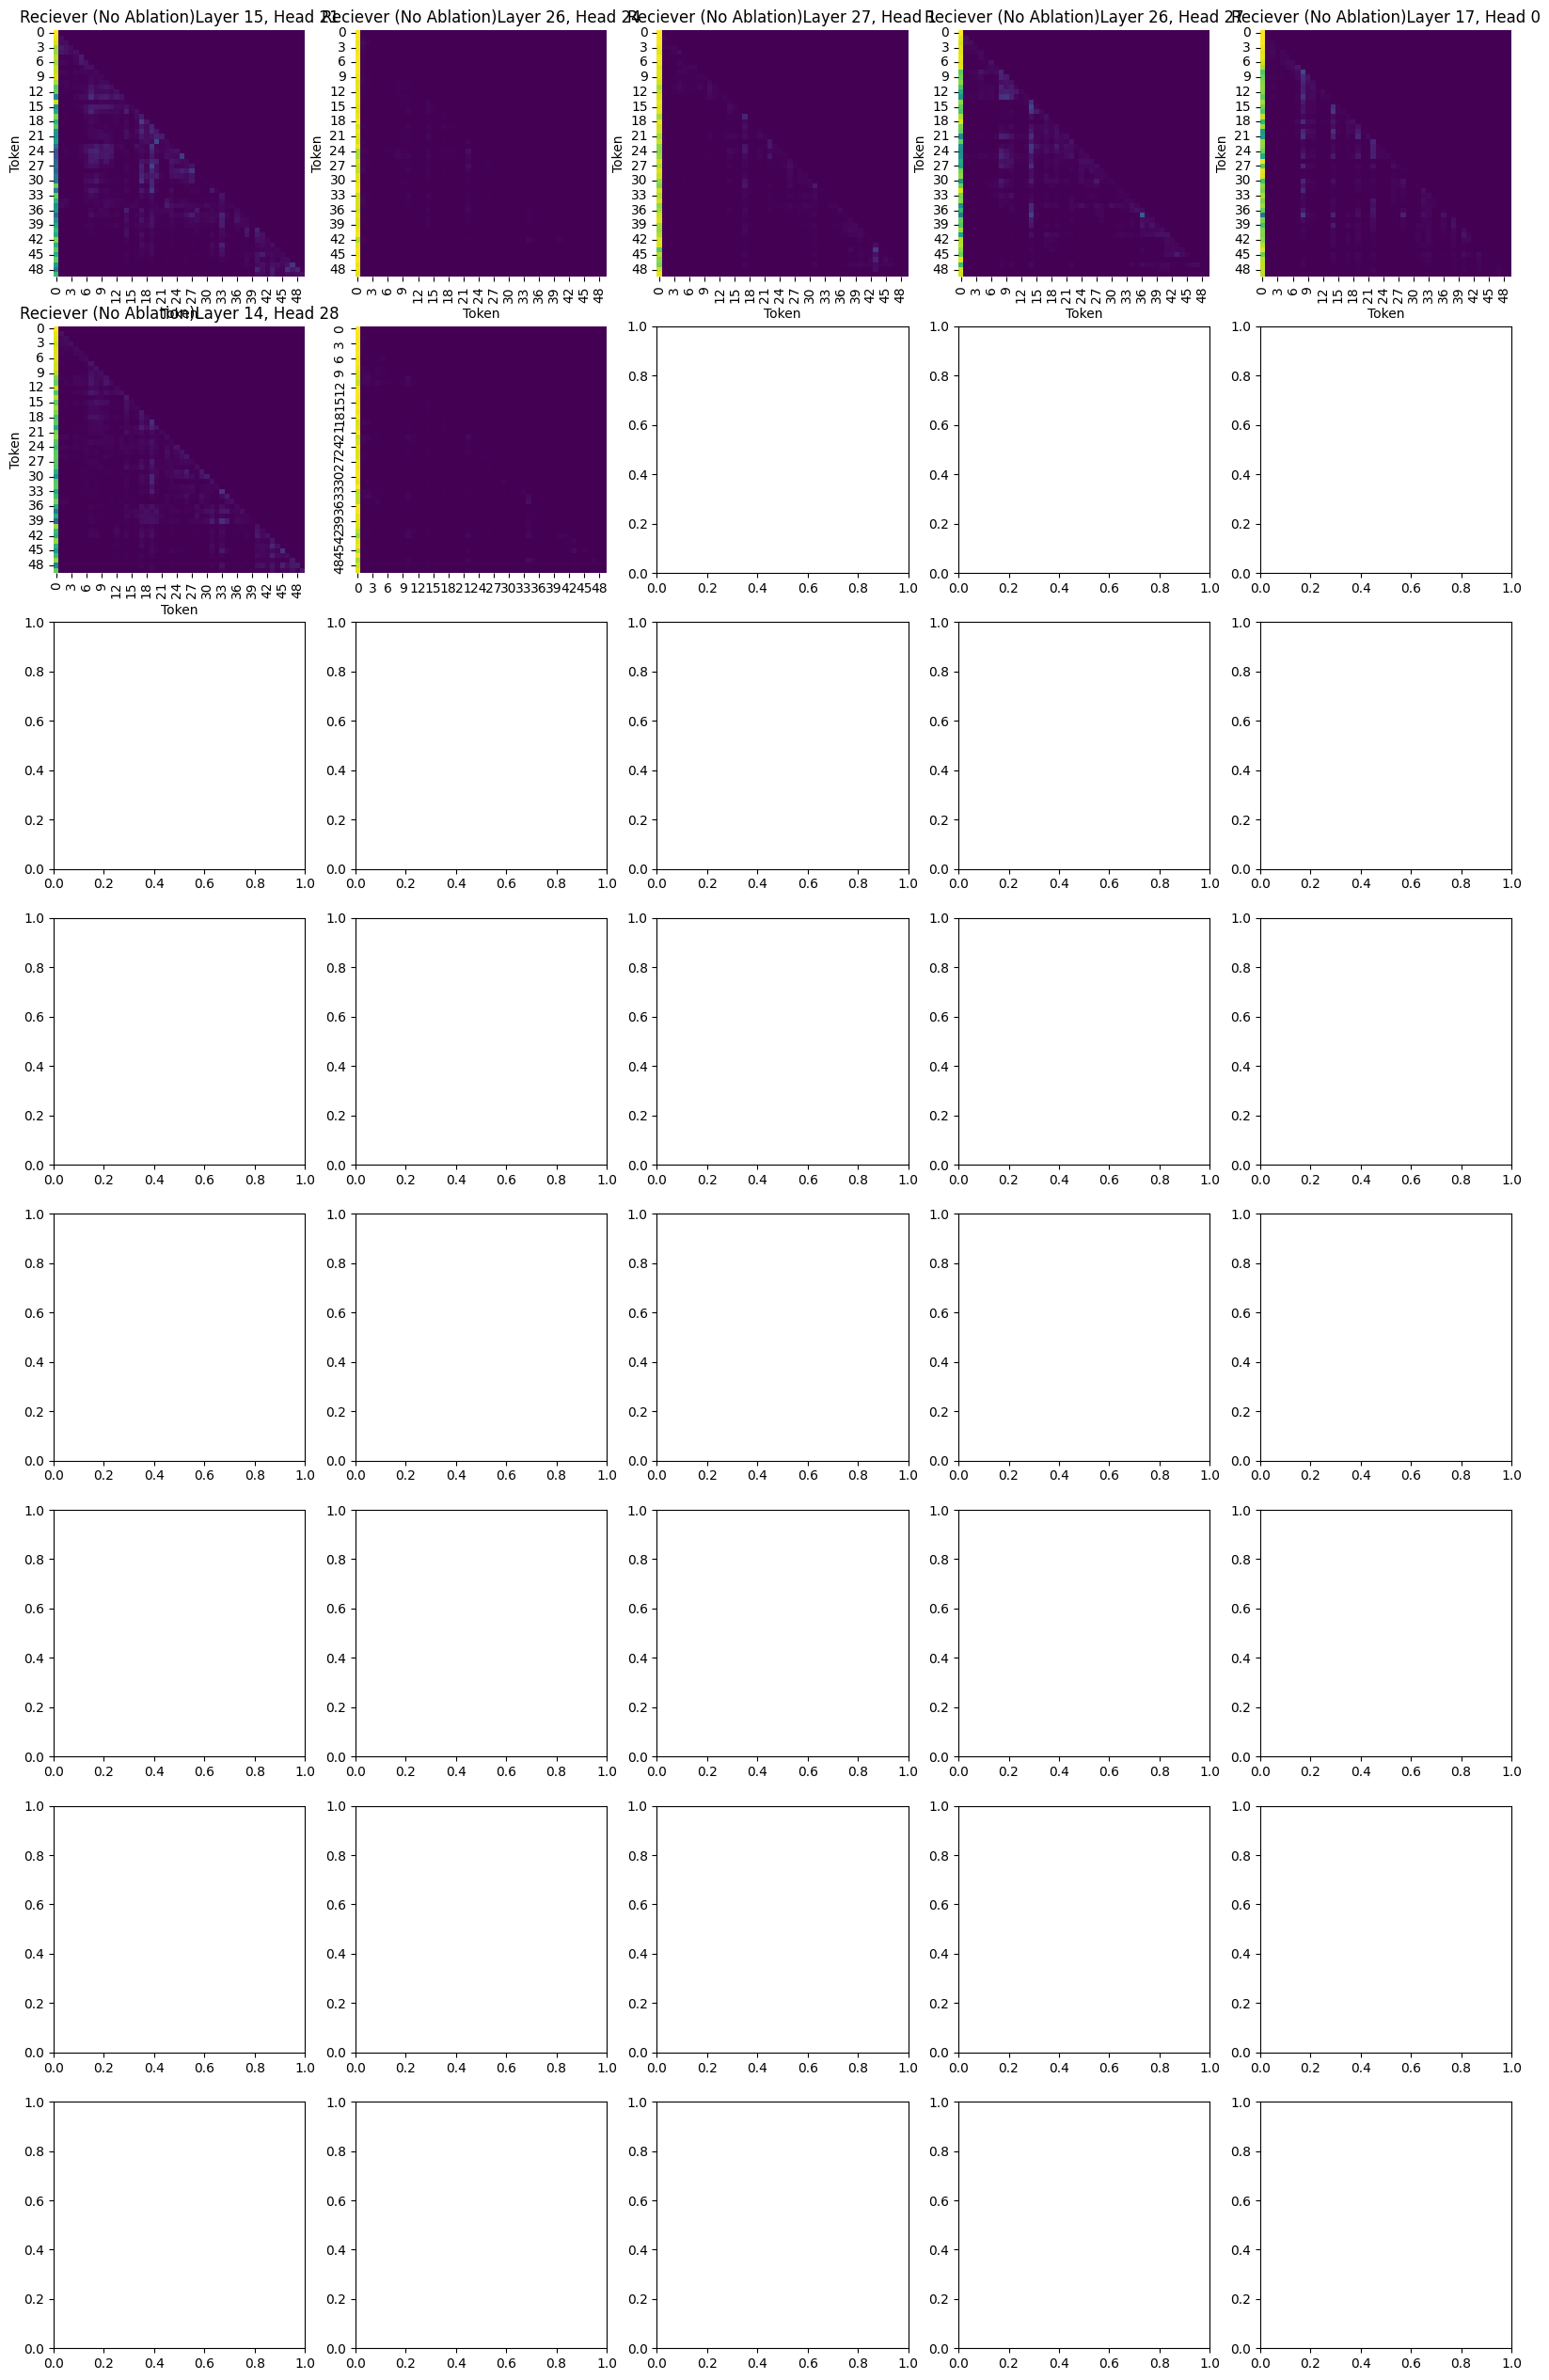

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_attention_heads(attention_tensor, head_list, title_prefix=""):
    num_heads = len(head_list)
    ncols = 5
    nrows = (num_heads + ncols - 1) // ncols
    fig, axes = plt.subplots(nrows, ncols, figsize=(4*ncols, 4*nrows))
    axes = axes.flatten()
    for idx, (layer, head) in enumerate(head_list):
        attn = attention_tensor[layer, head].detach().cpu().to(torch.float32).numpy()
        # Optionally, plot only a subset of tokens for clarity:
        attn = attn[:50, :50]  # first 50 tokens
        sns.heatmap(attn, ax=axes[idx], cmap='viridis', cbar=False)
        axes[idx].set_title(f"{title_prefix}Layer {layer}, Head {head}")
        axes[idx].set_xlabel('Token')
        axes[idx].set_ylabel('Token')
    # Hide unused subplots
    for j in range(idx+1, len(axes)):
        axes[j].axis('off')
    plt.tight_layout()
    plt.show()

# Plot reciever heads
plot_attention_heads(attention_all_heads_no_ablation, all_heads_to_check, title_prefix="Reciever (No Ablation)")

# Plot random heads
plot_attention_heads(attention_all_heads_no_ablation, all_heads_to_check, title_prefix="Random (No Ablation)")

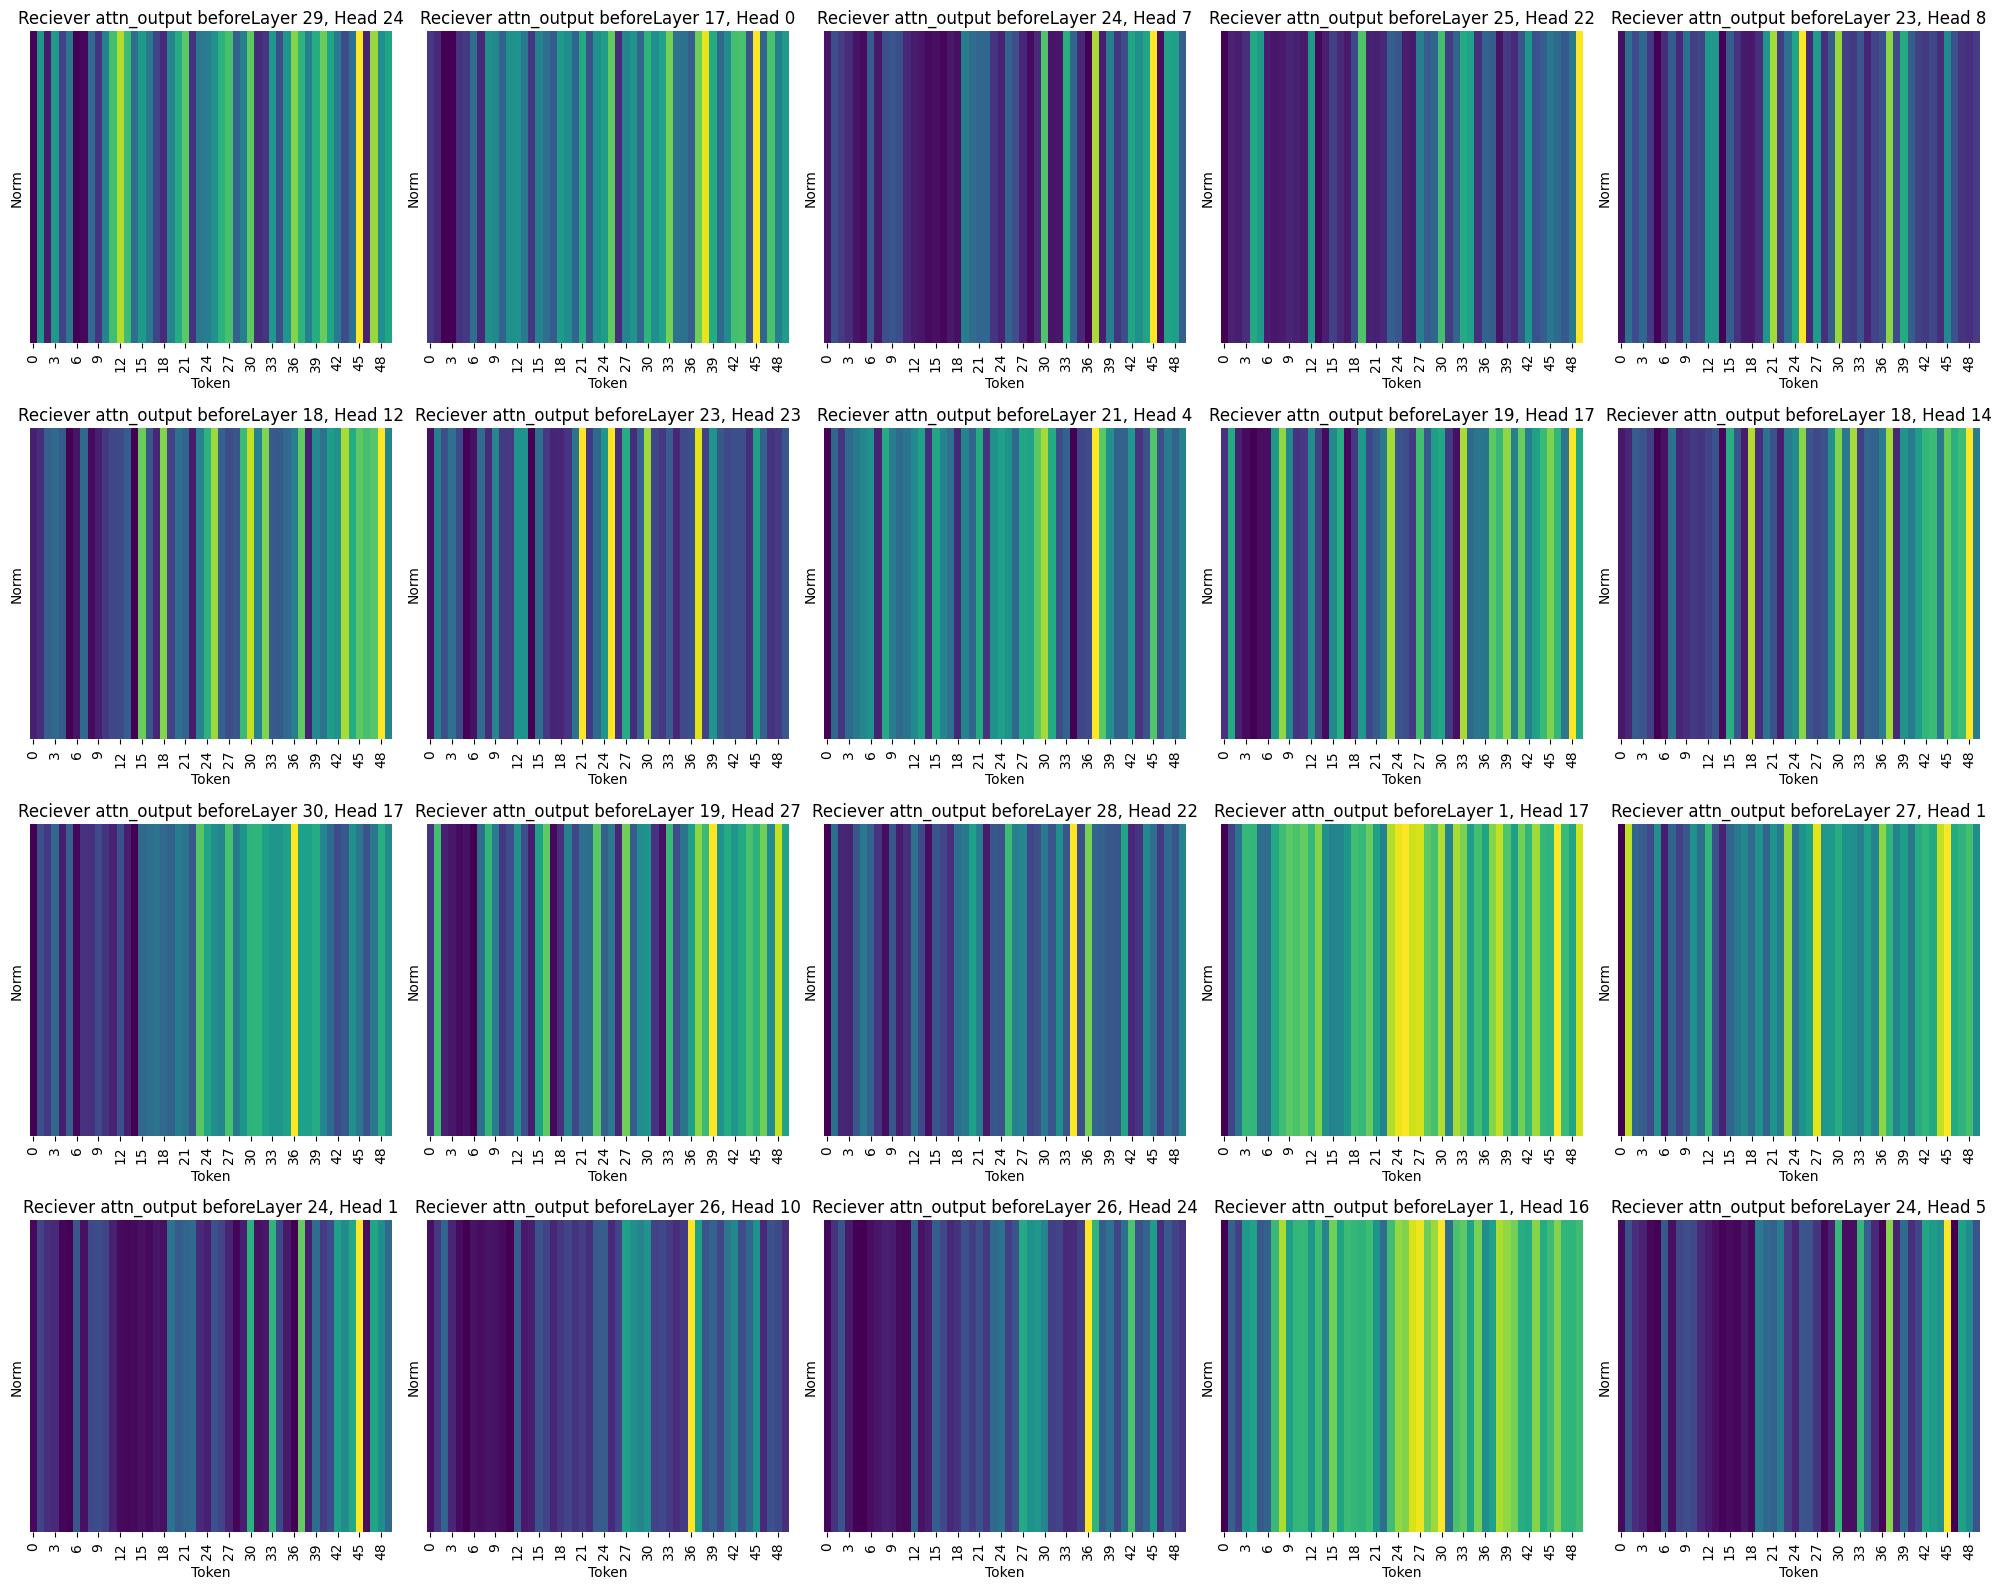

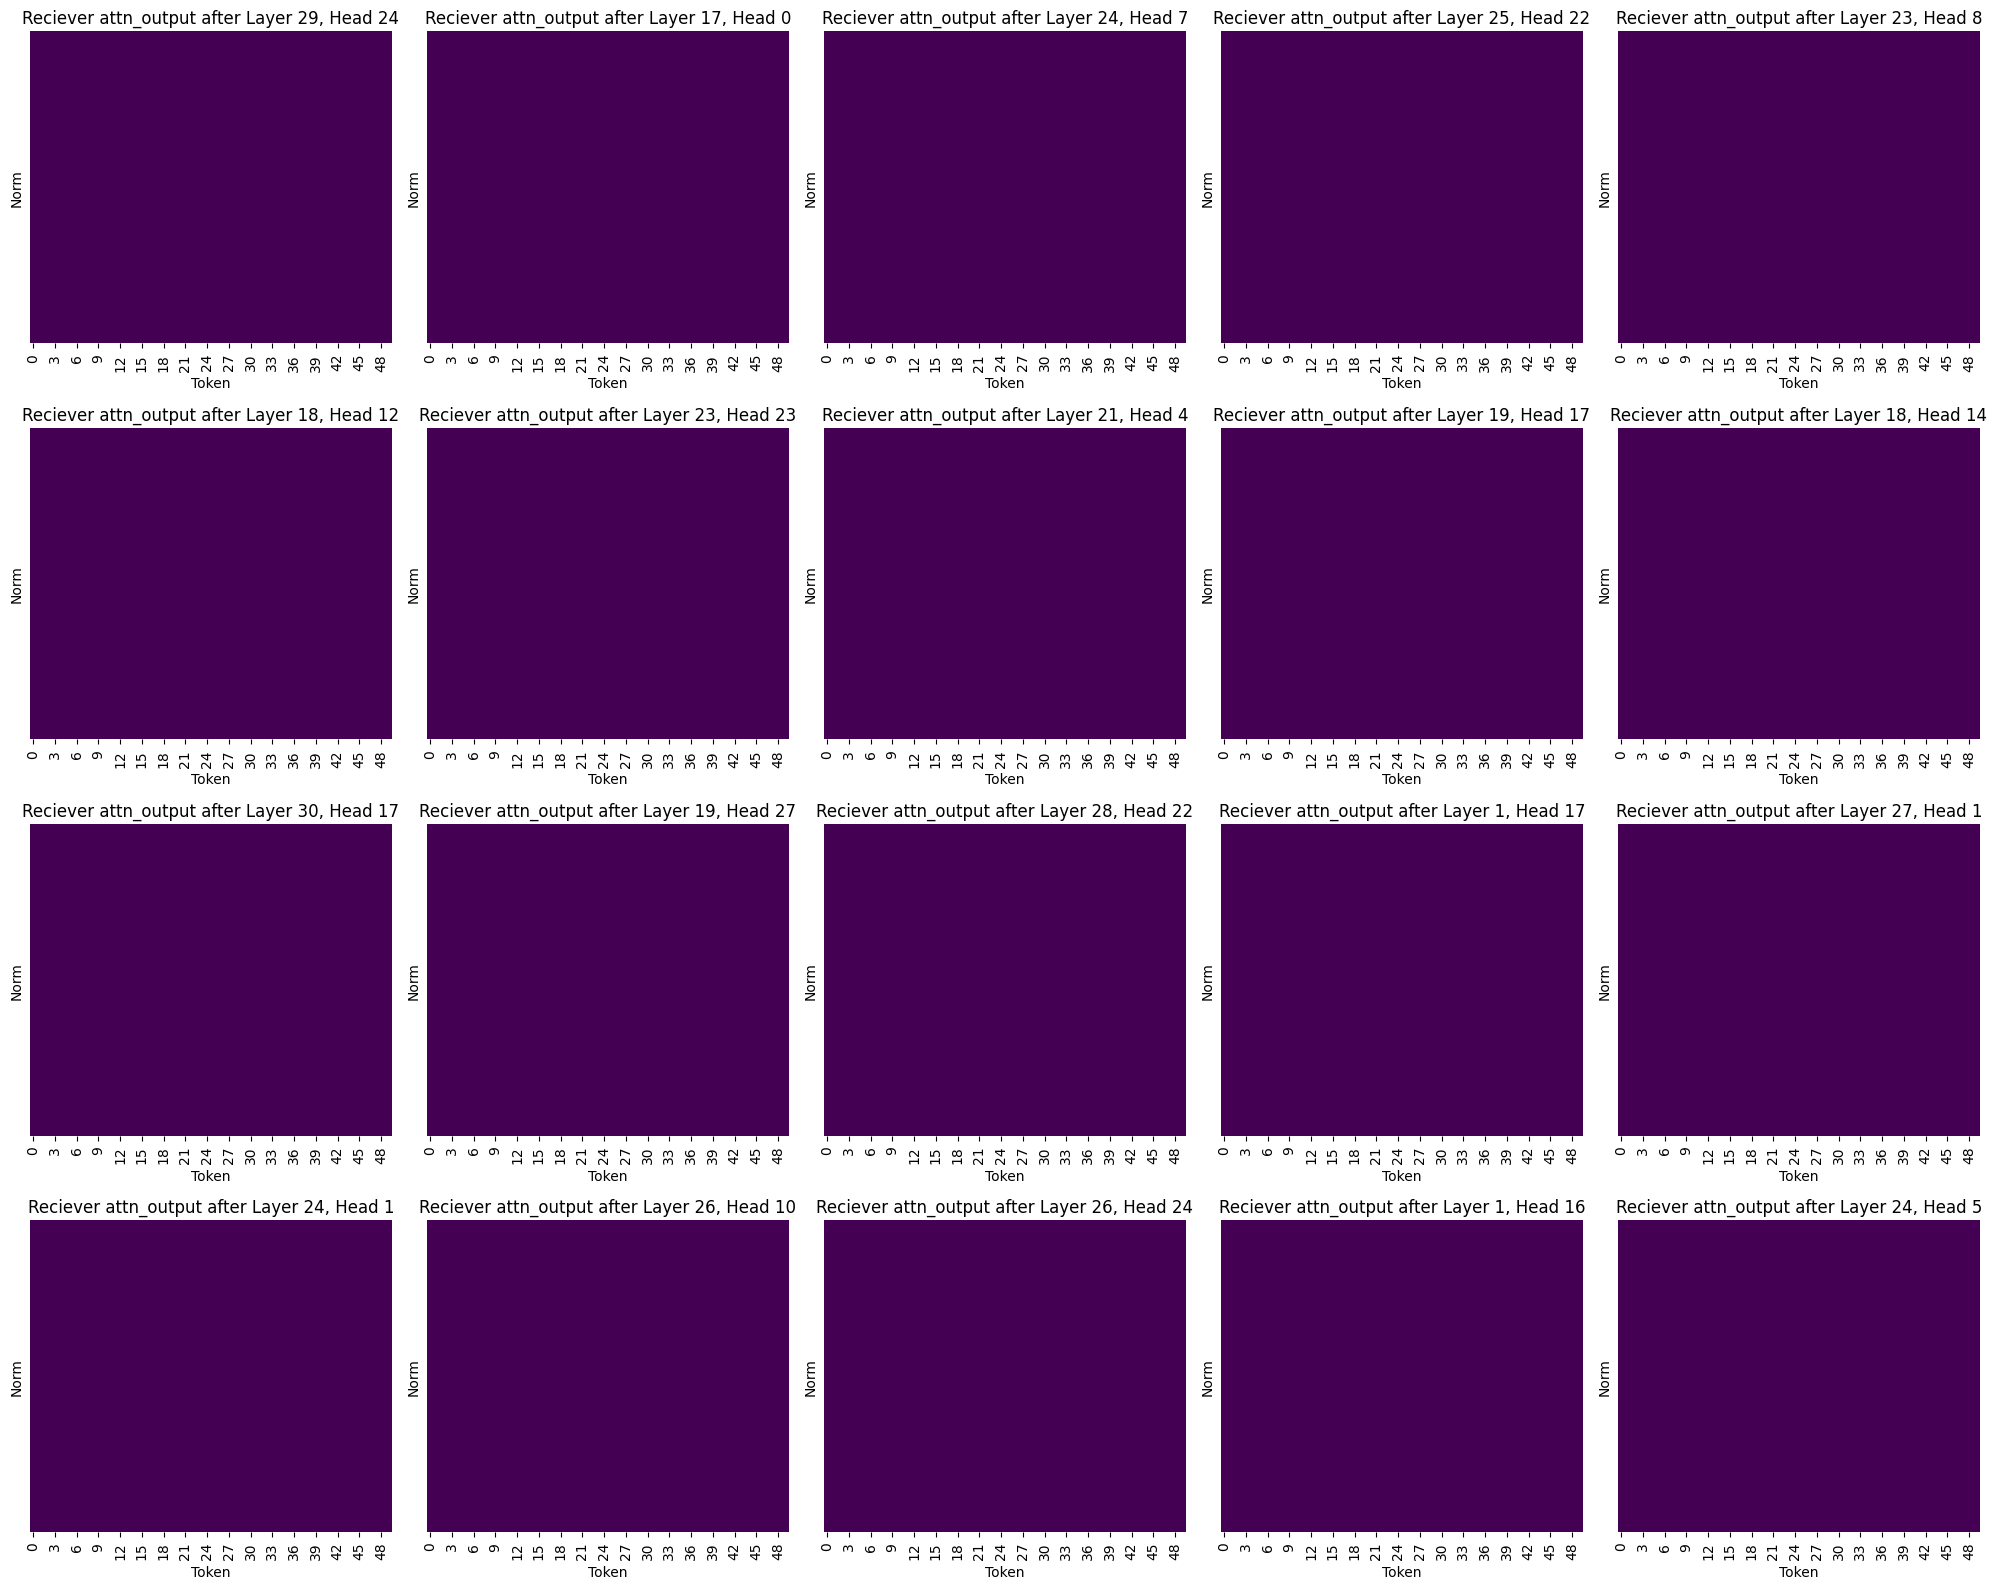

In [ ]:

# To visualize attn_output for each head in hidden_states_dict:
def plot_head_outputs(head_outputs, head_list, title_prefix=""):
    import matplotlib.pyplot as plt
    import seaborn as sns
    import torch

    num_heads = len(head_list)
    ncols = 5
    nrows = (num_heads + ncols - 1) // ncols
    fig, axes = plt.subplots(nrows, ncols, figsize=(4*ncols, 4*nrows))
    axes = axes.flatten()
    for idx, (layer, head) in enumerate(head_list):
        output = head_outputs.get((layer, head), {}).get("attn_output")
        if output is None:
            axes[idx].set_title(f"{title_prefix}Layer {layer}, Head {head}\n(No Data)")
            axes[idx].axis('off')
            continue
        # output shape: (batch, seq, head_dim)
        norm = output[0].norm(dim=-1).to(torch.float32).numpy()  # shape: (seq,)
        sns.heatmap(norm[None, :50], ax=axes[idx], cmap='viridis', cbar=False, yticklabels=False)
        axes[idx].set_title(f"{title_prefix}Layer {layer}, Head {head}")
        axes[idx].set_xlabel('Token')
        axes[idx].set_ylabel('Norm')
    for j in range(idx+1, len(axes)):
        axes[j].axis('off')
    plt.tight_layout()
    plt.show()

# Example usage:
plot_head_outputs(hidden_states_dict_before, reciever_heads, title_prefix="Reciever attn_output before")
plot_head_outputs(hidden_states_dict_after, reciever_heads, title_prefix="Reciever attn_output after ")

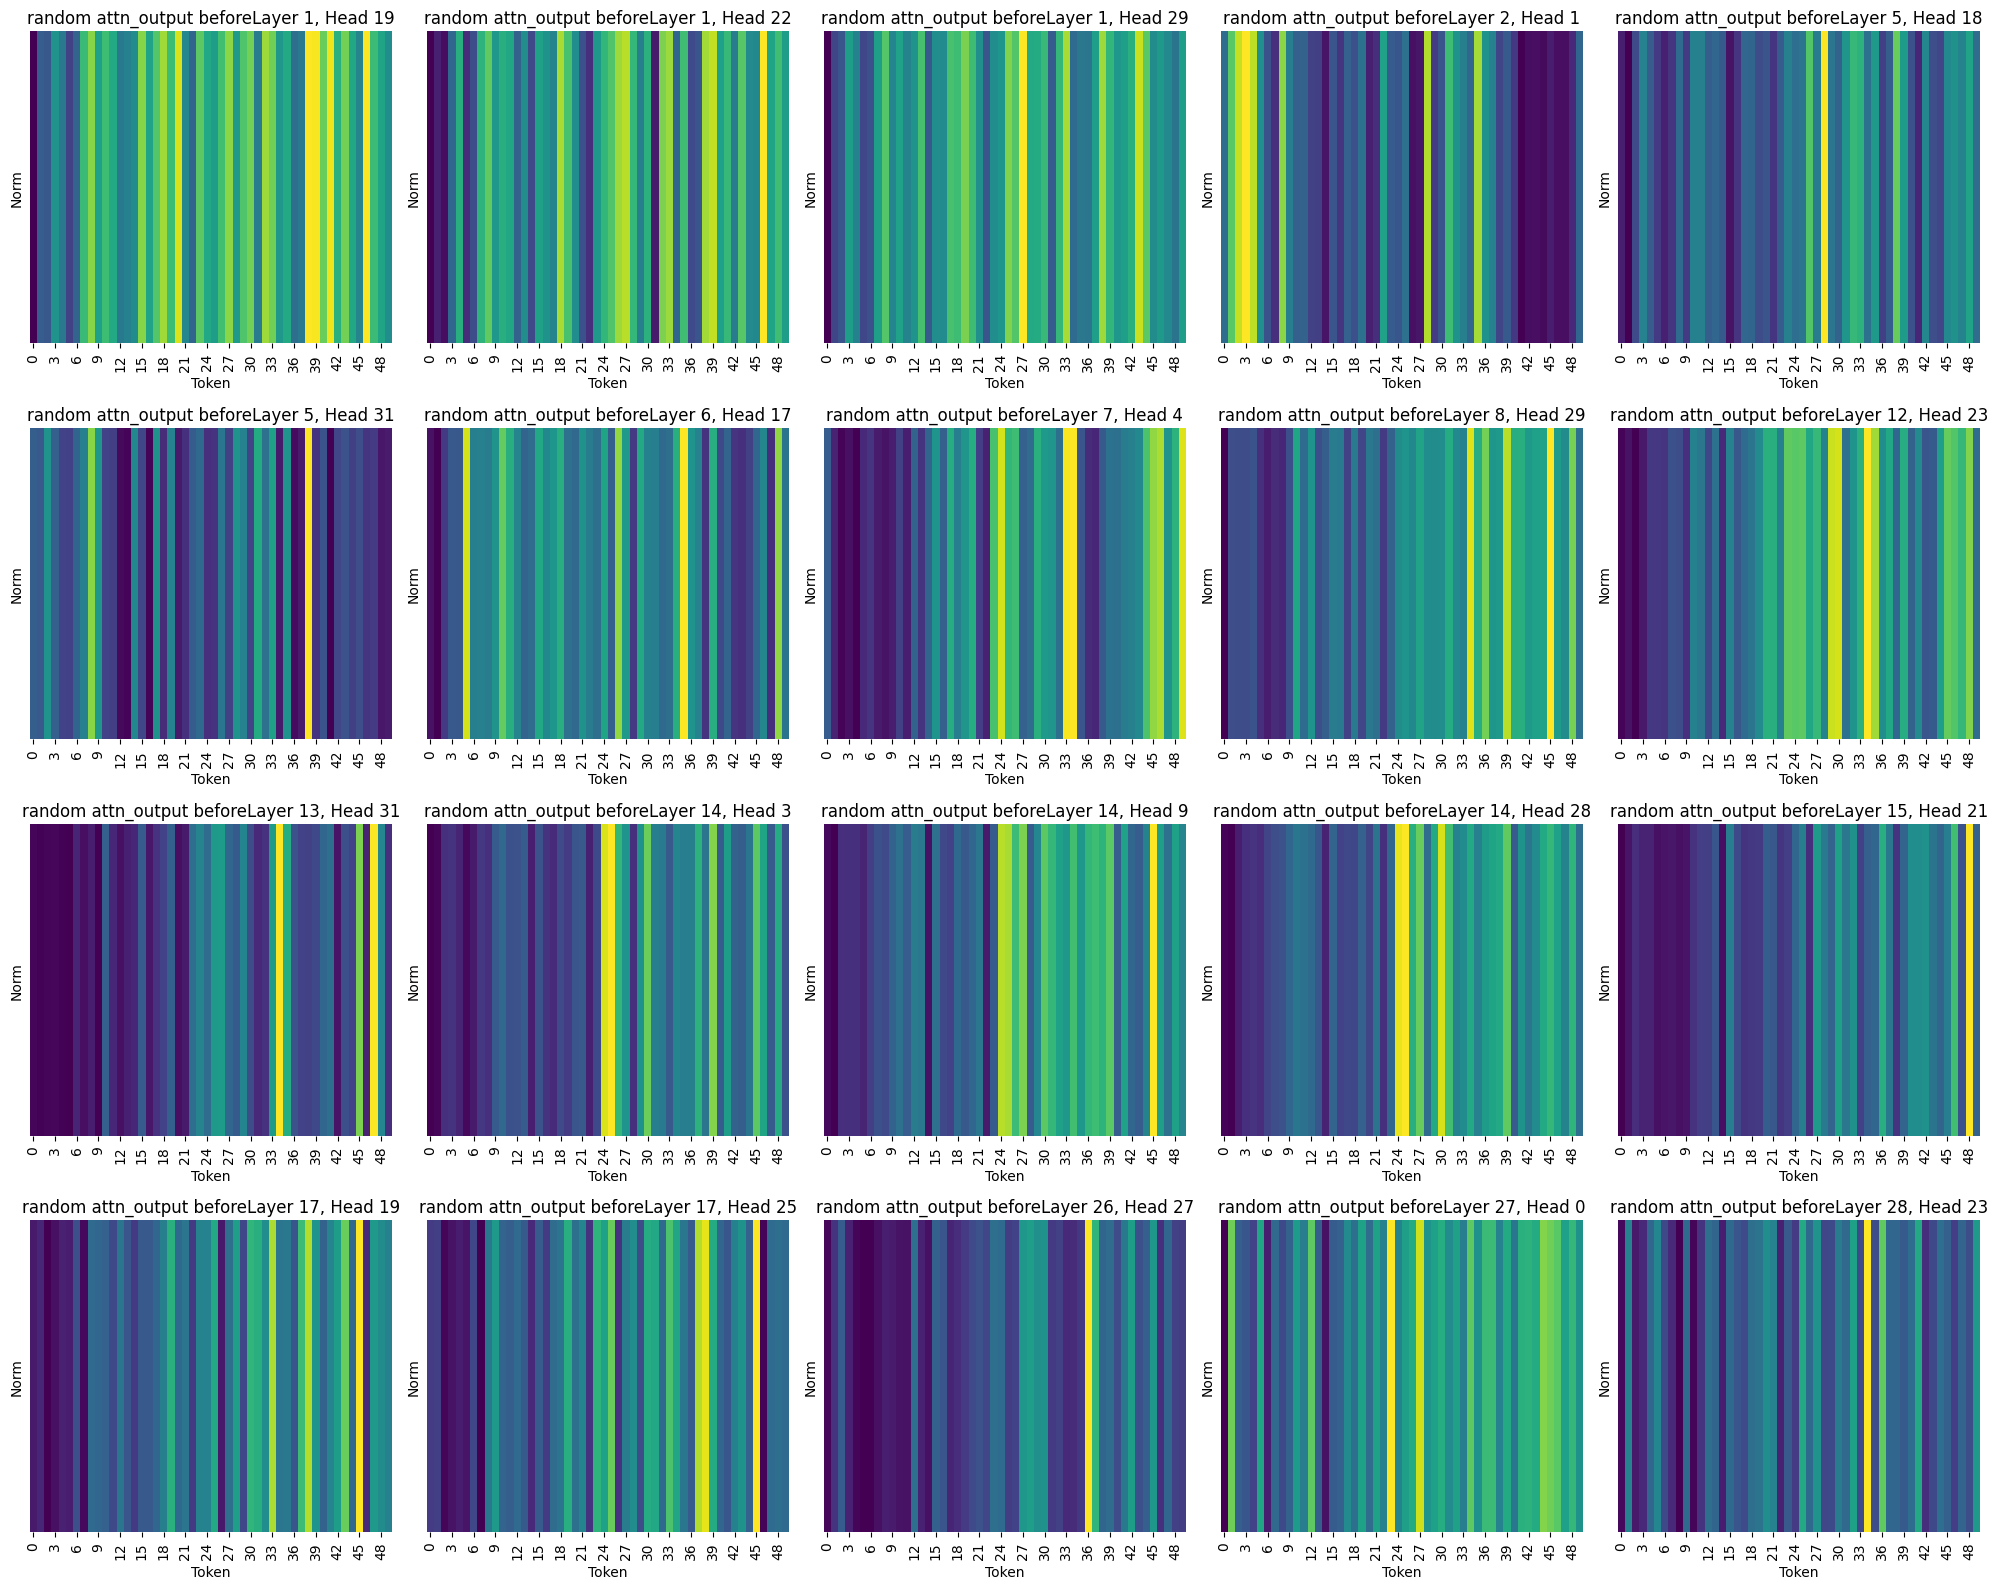

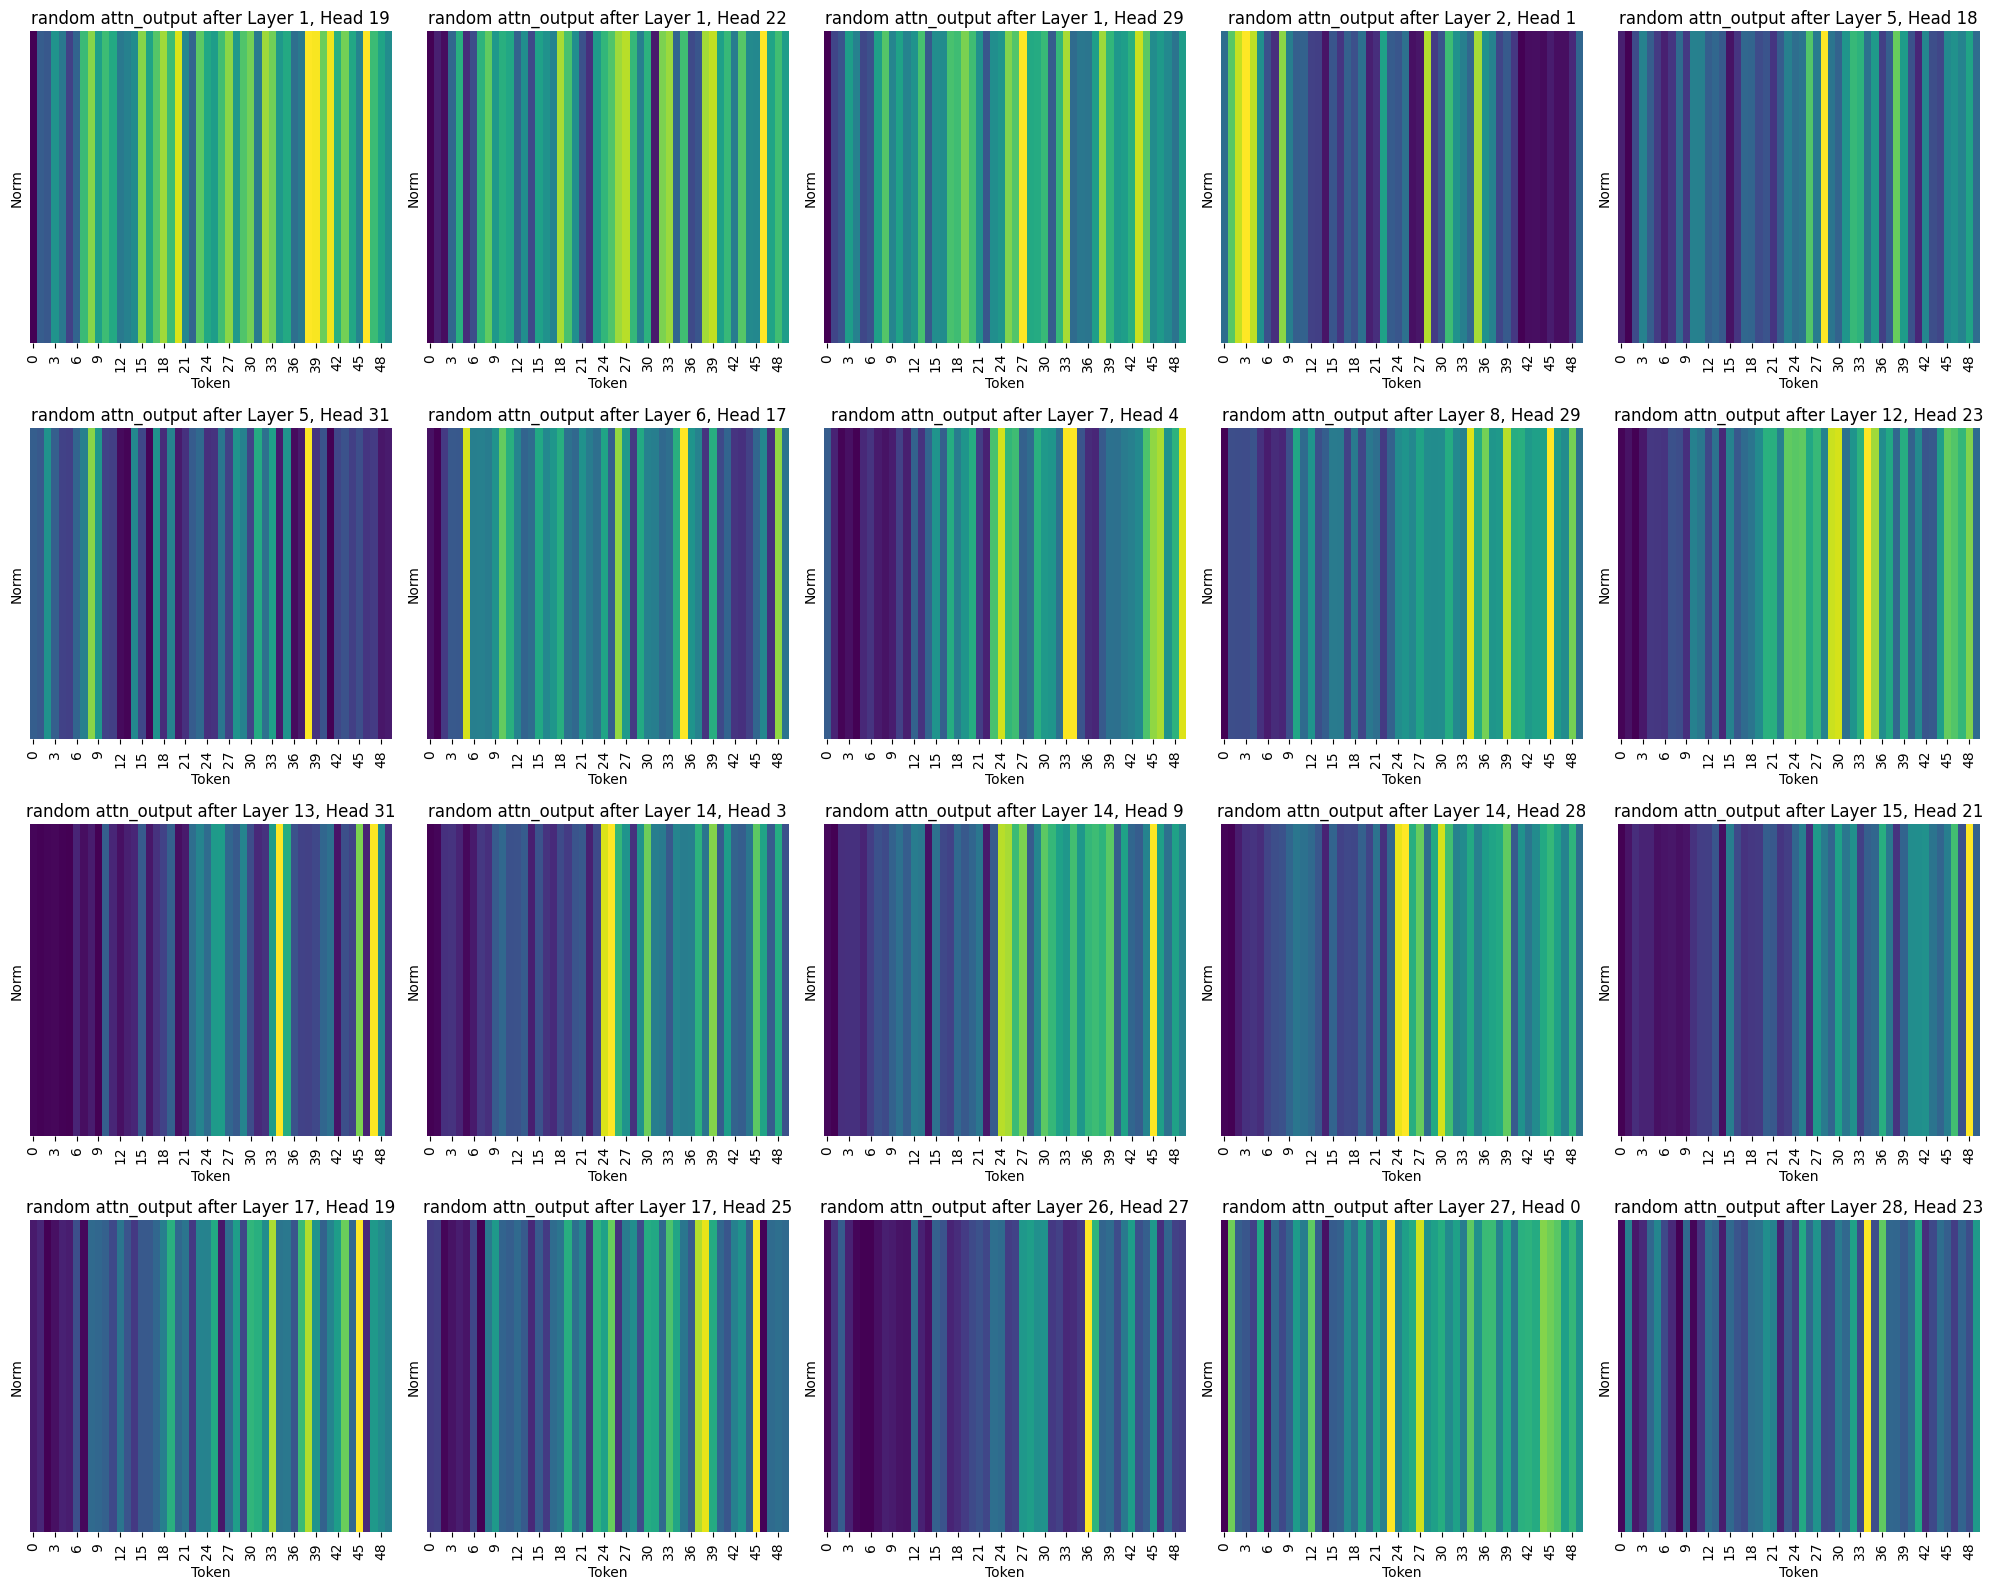

In [36]:
plot_head_outputs(hidden_states_dict_before, random_heads, title_prefix="random attn_output before")
plot_head_outputs(hidden_states_dict_after, random_heads, title_prefix="random attn_output after ")

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_hidden_states_attn_probs(hidden_states_dict, head_list, title_prefix=""):
    num_heads = len(head_list)
    ncols = 5
    nrows = (num_heads + ncols - 1) // ncols
    fig, axes = plt.subplots(nrows, ncols, figsize=(4*ncols, 4*nrows))
    axes = axes.flatten()
    for idx, (layer, head) in enumerate(head_list):
        attn_probs = hidden_states_dict.get((layer, head), {}).get("attn_probs")
        if attn_probs is None:
            axes[idx].set_title(f"{title_prefix}Layer {layer}, Head {head}\n(No Data)")
            axes[idx].axis('off')
            continue
        # attn_probs shape: (batch, seq, seq), usually batch=1
        attn = attn_probs[0].detach().cpu().numpy()
        attn = attn[:50, :50]  # plot first 50 tokens for clarity
        sns.heatmap(attn, ax=axes[idx], cmap='viridis', cbar=False)
        axes[idx].set_title(f"{title_prefix}Layer {layer}, Head {head}")
        axes[idx].set_xlabel('Token')
        axes[idx].set_ylabel('Token')
    # Hide unused subplots
    for j in range(idx+1, len(axes)):
        axes[j].axis('off')
    plt.tight_layout()
    plt.show()

# Example usage:
plot_hidden_states_attn_probs(hidden_states_dict, reciever_heads, title_prefix="Reciever (No Ablation) ")


In [ ]:
# random_heads
# reciever_heads

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_attention_heads(attention_tensor, head_list, title_prefix=""):
    num_heads = len(head_list)
    ncols = 5
    nrows = (num_heads + ncols - 1) // ncols
    fig, axes = plt.subplots(nrows, ncols, figsize=(4*ncols, 4*nrows))
    axes = axes.flatten()
    for idx, (layer, head) in enumerate(head_list):
        attn = attention_tensor[layer, head].detach().cpu().to(torch.float32).numpy()
        # Optionally, plot only a subset of tokens for clarity:
        attn = attn[:50, :50]  # first 50 tokens
        sns.heatmap(attn, ax=axes[idx], cmap='viridis', cbar=False)
        axes[idx].set_title(f"{title_prefix}Layer {layer}, Head {head}")
        axes[idx].set_xlabel('Token')
        axes[idx].set_ylabel('Token')
    # Hide unused subplots
    for j in range(idx+1, len(axes)):
        axes[j].axis('off')
    plt.tight_layout()
    plt.show()

# Plot reciever heads
plot_attention_heads(average_attention_all_heads_no_ablation, reciever_heads, title_prefix="Reciever (No Ablation)")

# Plot random heads
plot_attention_heads(average_attention_all_heads_no_ablation, random_heads, title_prefix="Random (No Ablation)")

In [ ]:
# all hooks code
#before hooks
# import torch.nn as nn
# view_hooks_before = []
# hidden_states_dict_before = {}
# dropout = 0.0  # Set to your model's dropout if needed

# for layer_idx, head_num in all_heads_to_check:
#     print(f"    Adding view hook for head ({layer_idx}, {head_num})")

#     # Define view hook for this specific head
#     def create_view_hook(target_head_num, layer_idx):
        
#         def view_hook(module, input, output):
#             attn_output, attn_weights = output

#             batch_size, seq_len, hidden_dim = attn_output.shape
#             num_heads = 32
#             head_dim = hidden_dim // num_heads
#             # Extract only the output for the target head
#             attn_output_reshaped = attn_output.view(batch_size, seq_len, num_heads, head_dim)
#             target_head_output = attn_output_reshaped[:, :, target_head_num, :]  # (batch, seq, head_dim)
#             # Extract only the attention probs for the target head
#             target_head_probs = attn_weights[:, target_head_num, :, :]  # (batch, seq, seq)


#             hidden_states_dict_before[(layer_idx, target_head_num)] = {
#                 "attn_output": target_head_output.detach().cpu().to(torch.float32),
#                 "attn_probs": target_head_probs.detach().cpu().to(torch.float32)
#         }
#             return output

#         return view_hook
    
#     # Register hook for this layer
#     attention_layer = model.model.layers[layer_idx].self_attn
#     hook = attention_layer.register_forward_hook(create_view_hook(head_num, layer_idx))
#     view_hooks_before.append((hook, layer_idx, head_num))

# hooks = []

# for layer_idx, head_num in reciever_heads_sorted:
#     print(f"    Adding ablation hook for head ({layer_idx}, {head_num})")
    
#     # Define ablation hook for this specific head
#     def create_ablation_hook(target_head_num):
#         def ablation_hook(module, input, output):
#             attention_output = output[0]
#             batch_size_tensor, seq_len, hidden_dim = attention_output.shape
#             num_heads = 32
#             head_dim = hidden_dim // num_heads
            
#             # Zero out the specific head
#             reshaped = attention_output.view(batch_size_tensor, seq_len, num_heads, head_dim)
#             reshaped[:, :, target_head_num, :] = 0
#             modified = reshaped.view(batch_size_tensor, seq_len, hidden_dim)
            
#             return (modified,) + output[1:]
#         return ablation_hook
    
#     # Register hook for this layer
#     attention_layer = model.model.layers[layer_idx].self_attn
#     hook = attention_layer.register_forward_hook(create_ablation_hook(head_num))
#     hooks.append((hook, layer_idx, head_num))

# # Count the number of hooks registered on all modules in the model
# def count_all_hooks(model):
#     total_hooks = 0
#     for name, module in model.named_modules():
#         # Each module has _forward_hooks, _backward_hooks, _forward_pre_hooks
#         for hook_dict in [module._forward_hooks, module._backward_hooks, module._forward_pre_hooks]:
#             total_hooks += len(hook_dict)
#     return total_hooks

# print("Total hooks registered:", count_all_hooks(model))

# def clear_all_hooks(*hook_lists):
#     """
#     Remove all hooks in the provided lists and clear the lists.
#     Usage: clear_all_hooks(view_hooks_before, hooks, view_hooks_after)
#     """
#     for hook_list in hook_lists:
#         for hook_tuple in hook_list:
#             hook = hook_tuple[0] if isinstance(hook_tuple, tuple) else hook_tuple
#             hook.remove()
#         hook_list.clear()

# # Example usage:
# # clear_all_hooks(view_hooks_before, hooks, view_hooks_after)